# Data Loading

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt                          #loading all necessary packages.
%matplotlib inline                   
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',250)
pd.set_option('display.float.format',lambda x:'%.5f'%x)

from sklearn.model_selection import train_test_split        

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
df=pd.read_csv('telecom_churn_data.csv')        # creating a dataframe

In [5]:
df.head()                                       # Top n rows of dataframe

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109         0.00000         0.00000         0.00000   
1     7001865778        109         0.00000         0.00000         0.00000   
2     7001625959        109         0.00000         0.00000         0.00000   
3     7001204172        109         0.00000         0.00000         0.00000   
4     7000142493        109         0.00000         0.00000         0.00000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0            9/30/2014 197.38500 214.81600 213.80300  21.10000          nan   
1            9/30/2014  34.04700 355.07400 268.32100  86.28500     24.11000   
2            9/30/2014 167.69000 189.05800 210.22600 290.71400     11.54000   
3            9/30/2014 221.33800 251.10200 508.05400 389.50000     99.91000   
4            9/30/2014 261.63600 309.87600 238.17400 163.42600     50.31000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          nan      0.00000          nan           nan           nan   
1     78.68000      7.68000     18.34000      15.74000      99.84000   
2     55.24000     37.26000     74.81000     143.33000     220.59000   
3     54.39000    310.98000    241.71000     123.31000     109.01000   
4    149.44000     83.89000     58.78000      76.96000      91.88000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0       0.00000           nan            nan            nan        0.00000   
1     304.76000      53.76000        0.00000        0.00000        0.00000   
2     208.36000     118.91000        0.00000        0.00000        0.00000   
3      71.68000     113.54000        0.00000       54.86000       44.38000   
4     124.26000      45.81000        0.00000        0.00000        0.00000   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            nan            nan            nan        0.00000            nan   
1        0.00000        0.00000        0.00000        0.00000        0.00000   
2       38.49000        0.00000        0.00000        0.00000       70.94000   
3        0.00000        0.00000       28.09000       39.04000        0.00000   
4        0.00000        0.00000        0.00000        0.00000        0.00000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               nan               nan           0.00000               nan   
1          23.88000          74.56000           7.68000          18.34000   
2           7.19000          28.74000          13.58000          14.39000   
3          73.68000          34.81000          10.61000          15.49000   
4          50.31000         149.44000          83.89000          58.78000   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               nan               nan           0.00000               nan   
1          11.51000          75.94000         291.86000          53.76000   
2          29.34000          16.86000          38.46000          28.16000   
3         107.43000          83.21000          22.46000          65.46000   
4          67.64000          91.88000         124.26000          37.89000   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               nan               nan           0.00000               nan   
1           0.00000           0.00000           0.00000           0.00000   
2          24.11000          21.79000          15.61000          22.24000   
3           1.91000        

# Data Understanding:

In [6]:
df.columns                     # column names of the dataset

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [7]:
print(df.shape)
print(df.size)                # shape and size of the dataframe

(99999, 226)
22599774


In [8]:
df.info(verbose=True)            # information of dataframe columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [9]:
df.describe()               # statistical information of all numerical columns.

mobile_number   circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count      99999.00000 99999.00000     98981.00000     98981.00000   
mean  7001207270.38754   109.00000         0.00000         0.00000   
std       695669.38629     0.00000         0.00000         0.00000   
min   7000000074.00000   109.00000         0.00000         0.00000   
25%   7000606232.50000   109.00000         0.00000         0.00000   
50%   7001204632.00000   109.00000         0.00000         0.00000   
75%   7001812030.50000   109.00000         0.00000         0.00000   
max   7002410905.00000   109.00000         0.00000         0.00000   

       loc_ic_t2o_mou      arpu_6      arpu_7      arpu_8      arpu_9  \
count     98981.00000 99999.00000 99999.00000 99999.00000 99999.00000   
mean          0.00000   282.98736   278.53665   279.15473   261.64507   
std           0.00000   328.43977   338.15629   344.47479   341.99863   
min           0.00000 -2258.70900 -2014.04500  -945.80800 -1899.50500   
25%           0.00000    93.41150    86.98050    84.12600    62.68500   
50%           0.00000   197.70400   191.64000   192.08000   176.84900   
75%           0.00000   371.06000   365.34450   369.37050   353.46650   
max           0.00000 27731.08800 35145.83400 33543.62400 38805.61700   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
count  96062.00000  96140.00000  94621.00000  92254.00000   96062.00000   
mean     132.39587    133.67080    133.01810    130.30233     197.93558   
std      297.20741    308.79415    308.95159    308.47767     316.85161   
min        0.00000      0.00000      0.00000      0.00000       0.00000   
25%        7.38000      6.66000      6.46000      5.33000      34.73000   
50%       34.31000     32.33000     32.36000     29.84000      96.31000   
75%      118.74000    115.59500    115.86000    112.13000     231.86000   
max     7376.71000   8157.78000  10752.56000  10427.46000    8362.36000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count   96140.00000   94621.00000   92254.00000    96062.00000    96140.00000   
mean      197.04513     196.57480     190.33722        9.95001        7.14990   
std       325.86280     327.17066     319.39609       72.82541       73.44795   
min         0.00000       0.00000       0.00000        0.00000        0.00000   
25%        32.19000      31.63000      27.13000        0.00000        0.00000   
50%        91.73500      92.14000      87.29000        0.00000        0.00000   
75%       226.81500     228.26000     220.50500        0.00000        0.00000   
max      9667.13000   14007.34000   10310.76000    13724.38000    15371.04000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count    94621.00000    92254.00000    96062.00000    96140.00000   
mean         7.29298        6.34384       13.91134        9.81873   
std         68.40247       57.13754       71.44320       58.45576   
min          0.00000        0.00000        0.00000        0.00000   
25%          0.00000        0.00000        0.00000        0.00000   
50%          0.00000        0.00000        0.00000        0.00000   
75%          0.00000        0.00000        0.00000        0.00000   
max      13095.36000     8464.03000     3775.11000     2812.04000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count    94621.00000    92254.00000       96062.00000       96140.00000   
mean         9.97189        8.55552          47.10076          46.47301   
std         64.71322       58.43819         150.85639         155.31870   
min          0.00000        0.00000           0.00000           0.00000   
25%          0.00000        0.00000           1.66000           1.63000   
50%          0.00000        0.00000          11.91000          11.61000   
75%          0.00000        0.00000          40.96000          39.91000   
max       5337.04000     4428.46000        6431.33000        7400.66000   

       loc_og_t2

# Data Cleaning:

## Sanity checks:

In [10]:
# We can see that some columns are in the form of dd/mm/yy but declared as object. 
date_col=df.select_dtypes(include=['object']).columns
df[date_col].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0            8/8/2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   
2           8/14/2014           9/29/2014                      NaN   
3           8/31/2014           9/30/2014                      NaN   
4            8/9/2014           9/28/2014                 6/4/2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014                 8/8/2014                      NaN  
1                7/25/2014                8/10/2014                      NaN  
2                      NaN                      NaN                9/17/2014  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [11]:
for i in date_col:                      # changing data types from object to datatime.
    df[i]=pd.to_datetime(df[i])

In [12]:
df[date_col].info()         # checking datatype of datetime columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

## Handling Null values:

In [13]:
df.isnull().sum()                  # null values in the dataset.

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [14]:
# getting the columns which have high number of null values
col_with_null_values=[]
for i in df.columns:
    if (df[i].isnull().sum()/df.shape[0])*100>=40.00:
        col_with_null_values.append(i)
print(len(col_with_null_values))
print(col_with_null_values)

40
['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [15]:
# dropping those columns
df.drop(col_with_null_values,axis=1,inplace=True)

In [16]:
df.shape     # shape of dataframe after dropping those columns

(99999, 186)

In [17]:
df.isnull().sum()   # we can see that some columns still have null values,we need to impute them with mean/median/mode values.

mobile_number              0
circle_id                  0
loc_og_t2o_mou          1018
std_og_t2o_mou          1018
loc_ic_t2o_mou          1018
last_date_of_month_6       0
last_date_of_month_7     601
last_date_of_month_8    1100
last_date_of_month_9    1659
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6             3937
onnet_mou_7             3859
onnet_mou_8             5378
onnet_mou_9             7745
offnet_mou_6            3937
offnet_mou_7            3859
offnet_mou_8            5378
offnet_mou_9            7745
roam_ic_mou_6           3937
roam_ic_mou_7           3859
roam_ic_mou_8           5378
roam_ic_mou_9           7745
roam_og_mou_6           3937
roam_og_mou_7           3859
roam_og_mou_8           5378
roam_og_mou_9           7745
loc_og_t2t_mou_6        3937
loc_og_t2t_mou_7        3859
loc_og_t2t_mou_8        5378
loc_og_t2t_mou_9        7745
loc_og_t2m_mou_6        3937
loc_og_t2m_mou

In [18]:
# In a month if total recharged amount is 0 then all outgoing data columns should be zero.
# Therefore if any one of that columns have null values they should be replaced by 0.
# It will be more effective than imputing with mean/median values.

# All outgoing variables of month 6
col_og_6=list(df.columns[df.columns.str.contains('6') & df.columns.str.contains('og')])

# All outgoing variables of month 7
col_og_7=list(df.columns[df.columns.str.contains('7') & df.columns.str.contains('og')])

# All outgoing variables of month 8
col_og_8=list(df.columns[df.columns.str.contains('8') & df.columns.str.contains('og')])

# All outgoing variables of month 9
col_og_9=list(df.columns[df.columns.str.contains('9') & df.columns.str.contains('og')])



# Applying the condition and imputing null values in col_og_6 columns.
for i in col_og_6:
    df.loc[(df[i].isnull()) & (df['max_rech_amt_6']==0),[i]] =0 

    
# Applying the condition and imputing null values in col_og_7 columns.
for i in col_og_7:
    df.loc[(df[i].isnull()) & (df['max_rech_amt_7']==0),[i]] =0 
    
    
# Applying the condition and imputing null values in col_og_8 columns.
for i in col_og_8:
    df.loc[(df[i].isnull()) & (df['max_rech_amt_8']==0),[i]] =0 
    
    
# Applying the condition and imputing null values in col_og_9 columns.
for i in col_og_9:
    df.loc[(df[i].isnull()) & (df['max_rech_amt_9']==0),[i]] =0 

In [19]:
out_col=col_og_6+col_og_7+col_og_8+col_og_9
df[out_col].isnull().sum()                     # These are the remaining null values after imputation

roam_og_mou_6       921
loc_og_t2t_mou_6    921
loc_og_t2m_mou_6    921
loc_og_t2f_mou_6    921
loc_og_t2c_mou_6    921
loc_og_mou_6        921
std_og_t2t_mou_6    921
std_og_t2m_mou_6    921
std_og_t2f_mou_6    921
std_og_t2c_mou_6    921
std_og_mou_6        921
isd_og_mou_6        921
spl_og_mou_6        921
og_others_6         921
total_og_mou_6        0
roam_og_mou_7       736
loc_og_t2t_mou_7    736
loc_og_t2m_mou_7    736
loc_og_t2f_mou_7    736
loc_og_t2c_mou_7    736
loc_og_mou_7        736
std_og_t2t_mou_7    736
std_og_t2m_mou_7    736
std_og_t2f_mou_7    736
std_og_t2c_mou_7    736
std_og_mou_7        736
isd_og_mou_7        736
spl_og_mou_7        736
og_others_7         736
total_og_mou_7        0
roam_og_mou_8       711
loc_og_t2t_mou_8    711
loc_og_t2m_mou_8    711
loc_og_t2f_mou_8    711
loc_og_t2c_mou_8    711
loc_og_mou_8        711
std_og_t2t_mou_8    711
std_og_t2m_mou_8    711
std_og_t2f_mou_8    711
std_og_t2c_mou_8    711
std_og_mou_8        711
isd_og_mou_8    

In [20]:
# For remaining null values in numerical columns we use median values to impute.
#Since we are yet to deal with outliers it is better to impute with median as mean is adversly effected by outliers.
num_col=list(df.select_dtypes(include=['float64','int64']).columns)
for i in num_col:
    df[i].fillna(df[i].median(),inplace=True)

In [21]:
df.isnull().sum().sum() # These null values are present in categorical/datetime columns.

15116

In [22]:
# For categorical columns we use mode values to impute and for categorical columns we will use mode values.
date_col=list(df.select_dtypes(include=['datetime']).columns)
for i in date_col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [23]:
df.isnull().sum().sum()        # We can see that all the null values are treated.

0

## Data Imbalance:

In [24]:
df.head()                          

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109         0.00000         0.00000         0.00000   
1     7001865778        109         0.00000         0.00000         0.00000   
2     7001625959        109         0.00000         0.00000         0.00000   
3     7001204172        109         0.00000         0.00000         0.00000   
4     7000142493        109         0.00000         0.00000         0.00000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0           2014-09-30 197.38500 214.81600 213.80300  21.10000     34.31000   
1           2014-09-30  34.04700 355.07400 268.32100  86.28500     24.11000   
2           2014-09-30 167.69000 189.05800 210.22600 290.71400     11.54000   
3           2014-09-30 221.33800 251.10200 508.05400 389.50000     99.91000   
4           2014-09-30 261.63600 309.87600 238.17400 163.42600     50.31000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0     32.33000      0.00000     29.84000      96.31000      91.73500   
1     78.68000      7.68000     18.34000      15.74000      99.84000   
2     55.24000     37.26000     74.81000     143.33000     220.59000   
3     54.39000    310.98000    241.71000     123.31000     109.01000   
4    149.44000     83.89000     58.78000      76.96000      91.88000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0       0.00000      87.29000        0.00000        0.00000        0.00000   
1     304.76000      53.76000        0.00000        0.00000        0.00000   
2     208.36000     118.91000        0.00000        0.00000        0.00000   
3      71.68000     113.54000        0.00000       54.86000       44.38000   
4     124.26000      45.81000        0.00000        0.00000        0.00000   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0        0.00000        0.00000        0.00000        0.00000        0.00000   
1        0.00000        0.00000        0.00000        0.00000        0.00000   
2       38.49000        0.00000        0.00000        0.00000       70.94000   
3        0.00000        0.00000       28.09000       39.04000        0.00000   
4        0.00000        0.00000        0.00000        0.00000        0.00000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0          10.96000          10.64000           0.00000           0.00000   
1          23.88000          74.56000           7.68000          18.34000   
2           7.19000          28.74000          13.58000          14.39000   
3          73.68000          34.81000          10.61000          15.49000   
4          50.31000         149.44000          83.89000          58.78000   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0          38.51000          37.86000           0.00000           0.00000   
1          11.51000          75.94000         291.86000          53.76000   
2          29.34000          16.86000          38.46000          28.16000   
3         107.43000          83.21000          22.46000          65.46000   
4          67.64000          91.88000         124.26000          37.89000   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0           0.00000           0.00000           0.00000           0.00000   
1           0.00000           0.00000           0.00000           0.00000   
2          24.11000          21.79000          15.61000          22.24000   
3           1.91000        

In [25]:
df.shape

(99999, 186)

In [26]:
no_uniq=[]             # identifying the columns which have only one unique value
for i in df.columns:
    if df[i].nunique()==1:
        no_uniq.append(i)
print(no_uniq)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [27]:
# We can drop these columns as they will not be useful in modelling
df.drop(no_uniq,axis=1,inplace=True)

In [28]:
df.shape

(99999, 170)

In [29]:
high_imb=[]                  # Now we need to extract the columns which have high data imbalance.
for i in df.columns:
    if df[i].value_counts(normalize=True).values[0]>0.80:
        high_imb.append(i)
print(high_imb)

['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9', 'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_7', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']


In [30]:
high_imb.remove('vol_3g_mb_9')

In [31]:
# Drop those columns
df.drop(high_imb,axis=1,inplace=True)

In [32]:
df.shape    # shape of dataframe after dropping those columns.

(99999, 118)

## Filtering High value customers:

In [33]:
df.head()        # top n rows of dataframe.

mobile_number    arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  \
0     7000842753 197.38500 214.81600 213.80300  21.10000     34.31000   
1     7001865778  34.04700 355.07400 268.32100  86.28500     24.11000   
2     7001625959 167.69000 189.05800 210.22600 290.71400     11.54000   
3     7001204172 221.33800 251.10200 508.05400 389.50000     99.91000   
4     7000142493 261.63600 309.87600 238.17400 163.42600     50.31000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0     32.33000      0.00000     29.84000      96.31000      91.73500   
1     78.68000      7.68000     18.34000      15.74000      99.84000   
2     55.24000     37.26000     74.81000     143.33000     220.59000   
3     54.39000    310.98000    241.71000     123.31000     109.01000   
4    149.44000     83.89000     58.78000      76.96000      91.88000   

   offnet_mou_8  offnet_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0       0.00000      87.29000          10.96000          10.64000   
1     304.76000      53.76000          23.88000          74.56000   
2     208.36000     118.91000           7.19000          28.74000   
3      71.68000     113.54000          73.68000          34.81000   
4     124.26000      45.81000          50.31000         149.44000   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0           0.00000           0.00000          38.51000          37.86000   
1           7.68000          18.34000          11.51000          75.94000   
2          13.58000          14.39000          29.34000          16.86000   
3          10.61000          15.49000         107.43000          83.21000   
4          83.89000          58.78000          67.64000          91.88000   

   loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0           0.00000           0.00000           0.00000           0.00000   
1         291.86000          53.76000           0.00000           0.00000   
2          38.46000          28.16000          24.11000          21.79000   
3          22.46000          65.46000           1.91000           0.65000   
4         124.26000          37.89000           0.00000           0.00000   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0           0.00000           0.00000           0.00000           0.00000   
1           0.00000           0.00000           2.91000           0.00000   
2          15.61000          22.24000         135.54000          45.76000   
3           4.91000           2.06000           0.00000           0.00000   
4           0.00000           1.93000           0.00000           0.00000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0      61.14000      59.78000       0.00000       0.00000           0.00000   
1      35.39000     150.51000     299.54000      72.11000           0.23000   
2      60.66000      67.41000      67.66000      64.81000           4.34000   
3     183.03000     118.68000      37.99000      83.03000          26.23000   
4     117.96000     241.33000     208.16000      98.61000           0.00000   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  \
0           0.00000           0.00000           0.00000           3.11000   
1           4.11000           0.00000           0.00000           0.00000   
2          26.49000          22.58000           8.76000          41.81000   
3          14.89000         289.58000         226.21000           2.99000   
4           0.00000           0.00000           0.00000           9.31000   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_mou_6  \
0           2.78000           0.00000           0.00000       9.70000   
1           0.46000           0.13000           0.00000       0.23000   
2          67.41000          75.53000           9.28000      47.64000   
3           1.73000           6.53000           9.99000      29.23000   
4           0.00000     

In [34]:
df.insert(1,'total_rech_amt_good_phase',(df['total_rech_amt_6']+df['total_rech_amt_7'])/2)

# deriving a new column to find the average of total amount recharged in good phase( first two months)
# we can use insert function to add the column at specified position.

In [35]:
df.head()             # top n rows of dataframe.

mobile_number  total_rech_amt_good_phase    arpu_6    arpu_7    arpu_8  \
0     7000842753                  307.00000 197.38500 214.81600 213.80300   
1     7001865778                  229.00000  34.04700 355.07400 268.32100   
2     7001625959                  241.50000 167.69000 189.05800 210.22600   
3     7001204172                  270.00000 221.33800 251.10200 508.05400   
4     7000142493                  273.00000 261.63600 309.87600 238.17400   

     arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0  21.10000     34.31000     32.33000      0.00000     29.84000      96.31000   
1  86.28500     24.11000     78.68000      7.68000     18.34000      15.74000   
2 290.71400     11.54000     55.24000     37.26000     74.81000     143.33000   
3 389.50000     99.91000     54.39000    310.98000    241.71000     123.31000   
4 163.42600     50.31000    149.44000     83.89000     58.78000      76.96000   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  loc_og_t2t_mou_6  \
0      91.73500       0.00000      87.29000          10.96000   
1      99.84000     304.76000      53.76000          23.88000   
2     220.59000     208.36000     118.91000           7.19000   
3     109.01000      71.68000     113.54000          73.68000   
4      91.88000     124.26000      45.81000          50.31000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0          10.64000           0.00000           0.00000          38.51000   
1          74.56000           7.68000          18.34000          11.51000   
2          28.74000          13.58000          14.39000          29.34000   
3          34.81000          10.61000          15.49000         107.43000   
4         149.44000          83.89000          58.78000          67.64000   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0          37.86000           0.00000           0.00000           0.00000   
1          75.94000         291.86000          53.76000           0.00000   
2          16.86000          38.46000          28.16000          24.11000   
3          83.21000          22.46000          65.46000           1.91000   
4          91.88000         124.26000          37.89000           0.00000   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_7  \
0           0.00000           0.00000           0.00000           0.00000   
1           0.00000           0.00000           0.00000           2.91000   
2          21.79000          15.61000          22.24000         135.54000   
3           0.65000           4.91000           2.06000           0.00000   
4           0.00000           0.00000           1.93000           0.00000   

   loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0           0.00000      61.14000      59.78000       0.00000       0.00000   
1           0.00000      35.39000     150.51000     299.54000      72.11000   
2          45.76000      60.66000      67.41000      67.66000      64.81000   
3           0.00000     183.03000     118.68000      37.99000      83.03000   
4           0.00000     117.96000     241.33000     208.16000      98.61000   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  \
0           0.00000           0.00000           0.00000           0.00000   
1           0.23000           4.11000           0.00000           0.00000   
2           4.34000          26.49000          22.58000           8.76000   
3          26.23000          14.89000         289.58000         226.21000   
4           0.00000           0.00000           0.00000           0.00000   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  \
0           3.11000           2.78000           0.00000           0.00000   
1           0.00000           0.46000           0.13000           0.00000   
2          41.81000          67.41000          75.53000           9.28000   
3           2.99000        

In [36]:
val=np.percentile(df['total_rech_amt_good_phase'],70)
val                                # Deriving 70th percentile of average recharge amount in good phase

368.5

In [37]:
df.head()                # top n rows of dataframe.

mobile_number  total_rech_amt_good_phase    arpu_6    arpu_7    arpu_8  \
0     7000842753                  307.00000 197.38500 214.81600 213.80300   
1     7001865778                  229.00000  34.04700 355.07400 268.32100   
2     7001625959                  241.50000 167.69000 189.05800 210.22600   
3     7001204172                  270.00000 221.33800 251.10200 508.05400   
4     7000142493                  273.00000 261.63600 309.87600 238.17400   

     arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0  21.10000     34.31000     32.33000      0.00000     29.84000      96.31000   
1  86.28500     24.11000     78.68000      7.68000     18.34000      15.74000   
2 290.71400     11.54000     55.24000     37.26000     74.81000     143.33000   
3 389.50000     99.91000     54.39000    310.98000    241.71000     123.31000   
4 163.42600     50.31000    149.44000     83.89000     58.78000      76.96000   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  loc_og_t2t_mou_6  \
0      91.73500       0.00000      87.29000          10.96000   
1      99.84000     304.76000      53.76000          23.88000   
2     220.59000     208.36000     118.91000           7.19000   
3     109.01000      71.68000     113.54000          73.68000   
4      91.88000     124.26000      45.81000          50.31000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0          10.64000           0.00000           0.00000          38.51000   
1          74.56000           7.68000          18.34000          11.51000   
2          28.74000          13.58000          14.39000          29.34000   
3          34.81000          10.61000          15.49000         107.43000   
4         149.44000          83.89000          58.78000          67.64000   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0          37.86000           0.00000           0.00000           0.00000   
1          75.94000         291.86000          53.76000           0.00000   
2          16.86000          38.46000          28.16000          24.11000   
3          83.21000          22.46000          65.46000           1.91000   
4          91.88000         124.26000          37.89000           0.00000   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_7  \
0           0.00000           0.00000           0.00000           0.00000   
1           0.00000           0.00000           0.00000           2.91000   
2          21.79000          15.61000          22.24000         135.54000   
3           0.65000           4.91000           2.06000           0.00000   
4           0.00000           0.00000           1.93000           0.00000   

   loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0           0.00000      61.14000      59.78000       0.00000       0.00000   
1           0.00000      35.39000     150.51000     299.54000      72.11000   
2          45.76000      60.66000      67.41000      67.66000      64.81000   
3           0.00000     183.03000     118.68000      37.99000      83.03000   
4           0.00000     117.96000     241.33000     208.16000      98.61000   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  \
0           0.00000           0.00000           0.00000           0.00000   
1           0.23000           4.11000           0.00000           0.00000   
2           4.34000          26.49000          22.58000           8.76000   
3          26.23000          14.89000         289.58000         226.21000   
4           0.00000           0.00000           0.00000           0.00000   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  \
0           3.11000           2.78000           0.00000           0.00000   
1           0.00000           0.46000           0.13000           0.00000   
2          41.81000          67.41000          75.53000           9.28000   
3           2.99000        

In [38]:
df.shape

(99999, 119)

In [39]:
df=df[df['total_rech_amt_good_phase']>=val] # Filtering the data for getting high value customers.

In [40]:
df.shape               # Checking the shape of dataframe after filtering.

(30011, 119)

# Deriving variables:

In [41]:
Churn=pd.Series([])           # Deriving target variable based on the given condition
churn=((df["total_ic_mou_9"]==0) & (df["total_og_mou_9"]==0) & (df["vol_2g_mb_9"]==0) & (df["vol_3g_mb_9"]==0))
churn.head()

7      True
8     False
13    False
16    False
17    False
dtype: bool

In [42]:
df.insert(df.shape[1],'churn',churn.apply(lambda x:1 if x==True else 0))
# Inserting target variable at the end of the dataframe.

In [43]:
df.head()            # Top n rows of dataframe

mobile_number  total_rech_amt_good_phase     arpu_6     arpu_7     arpu_8  \
7      7000701601                 1185.00000 1069.18000 1349.85000 3171.48000   
8      7001524846                  519.00000  378.72100  492.22300  137.36200   
13     7002191713                  380.00000  492.84600  205.67100  593.26000   
16     7000875565                  459.00000  430.97500  299.86900  187.89400   
17     7000187447                  408.00000  690.00800   18.98000   25.49900   

      arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
7  500.00000     57.84000     54.68000     52.29000     29.84000   
8  166.78700    413.69000    351.03000     35.08000     33.46000   
13 322.73200    501.76000    108.39000    534.24000    244.81000   
16 206.49000     50.51000     74.01000     70.61000     31.34000   
17 257.58300   1185.91000      9.28000      7.79000    558.51000   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  loc_og_t2t_mou_6  \
7      453.43000     567.16000     325.91000      87.29000          51.39000   
8       94.66000      80.63000     136.48000     108.71000         297.13000   
13     413.31000     119.28000     482.46000     214.06000          49.63000   
16     296.29000     229.74000     162.76000     224.39000          42.61000   
17      61.64000       0.00000       5.54000      87.89000          38.99000   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
7           31.38000          40.28000           0.00000         308.63000   
8          217.59000          12.49000          26.13000          80.96000   
13           6.19000          36.01000           6.14000         151.13000   
16          65.16000          67.38000          26.88000         273.29000   
17           0.00000           0.00000          36.41000          58.54000   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
7          447.38000         162.28000           0.00000          62.13000   
8           70.58000          50.54000          34.58000           0.00000   
13          47.28000         294.46000         108.24000           4.54000   
16         145.99000         128.28000         201.49000           0.00000   
17           0.00000           0.00000           9.38000           0.00000   

    loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_7  \
7           55.14000          53.23000           0.00000           0.00000   
8            0.00000           0.00000           0.00000           0.00000   
13           0.00000          23.51000           5.29000           0.00000   
16           4.48000          10.26000           4.66000           0.00000   
17           0.00000           0.00000           0.00000           0.00000   

    loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
7            0.00000     422.16000     533.91000     255.79000       0.00000   
8            7.15000     378.09000     288.18000      63.04000      60.71000   
13           0.49000     205.31000      53.48000     353.99000     119.69000   
16           0.00000     315.91000     215.64000     205.93000     233.04000   
17           0.00000      97.54000       0.00000       0.00000      45.79000   

    std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  \
7            4.30000          23.29000          12.01000           0.00000   
8          116.56000         133.43000          22.58000           7.33000   
13         446.41000          85.98000         498.23000         230.38000   
16           7.89000           2.58000           3.23000           4.46000   
17        1146.91000           0.81000           0.00000         504.11000   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  \
7           49.89000          31.76000          49.14000           0.00000   
8           13.69000          10.04000          75.69000          74.13000   
13         255.36000          52.940

In [44]:
len(df.columns[df.columns.str.endswith('_9')])  # no.of columns ending with '_9'.

30

In [45]:
# Now we can drop which we considered for churn i.e all the variables ending with '_9'
df.drop(df.columns[df.columns.str.endswith('_9')],axis=1,inplace=True)

In [46]:
# Mobile number is not useful in predicting churn so we can drop that column.
df.drop('mobile_number',axis=1,inplace=True)

In [47]:
df.shape   # shape of the data frame after dropping those columns

(30011, 89)

In [48]:
df['churn'].value_counts(normalize=True)*100     # we can see that distribution of churn variable.

0   91.35983
1    8.64017
Name: churn, dtype: float64

## Outlier Analysis:

In [49]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99]) # statistical info of all numerical columns

total_rech_amt_good_phase      arpu_6      arpu_7      arpu_8  \
count                30011.00000 30011.00000 30011.00000 30011.00000   
mean                   696.66436   587.28440   589.13543   534.85743   
std                    488.78209   442.72241   462.89781   492.25959   
min                    368.50000 -2258.70900 -2014.04500  -945.80800   
1%                     371.00000    18.23190    25.78270     0.00000   
10%                    396.50000   270.49100   274.34100   134.17000   
25%                    450.00000   364.16100   365.00450   289.60950   
50%                    568.50000   495.68200   493.56100   452.09100   
75%                    795.50000   703.92200   700.78800   671.15000   
90%                   1118.00000   994.09900   995.55700   985.20200   
95%                   1406.00000  1240.79350  1261.42150  1258.55550   
99%                   2216.30000  1983.08950  1999.37450  1987.93440   
max                  37762.50000 27731.08800 35145.83400 33543.62400   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  30011.00000  30011.00000  30011.00000   30011.00000   30011.00000   
mean     296.39573    304.66962    268.61183     418.94747     424.85056   
std      460.55674    481.58509    466.01448     469.78993     485.80420   
min        0.00000      0.00000      0.00000       0.00000       0.00000   
1%         0.00000      0.00000      0.00000       1.06200       1.11200   
10%       12.21000     11.69000      6.88000      58.59000      59.58000   
25%       41.11000     40.95000     32.36000     137.33500     135.68000   
50%      125.83000    125.46000     99.44000     282.19000     281.94000   
75%      353.31000    359.92500    297.73500     523.12500     532.69500   
90%      794.98000    824.38000    723.61000     915.58000     935.69000   
95%     1153.97000   1208.17500   1115.66000    1271.47000    1286.28500   
99%     2166.37000   2220.36700   2188.50400    2326.29000    2410.10400   
max     7376.71000   8157.78000  10752.56000    8362.36000    9667.13000   

       offnet_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   30011.00000       30011.00000       30011.00000       30011.00000   
mean      377.90155          94.74059          95.77901          87.18572   
std       475.49246         236.82670         248.11466         234.70596   
min         0.00000           0.00000           0.00000           0.00000   
1%          0.00000           0.00000           0.00000           0.00000   
10%        35.08000           0.99000           1.23000           0.00000   
25%        95.69500           8.65000           9.43000           6.01000   
50%       240.94000          32.59000          33.16000          28.64000   
75%       482.61000          91.46000          91.48000          84.67000   
90%       853.79000         207.93000         207.84000         196.91000   
95%      1188.46000         348.61500         346.90000         324.14500   
99%      2211.64200        1076.24200        1059.87500         956.50200   
max     14007.34000        6431.33000        7400.66000       10752.56000   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count       30011.00000       30011.00000       30011.00000       30011.00000   
mean          181.49003         181.44688         167.75386           6.97933   
std           249.99562         240.60378         234.75893          22.66552   
min             0.00000           0.00000           0.00000           0.00000   
1%              0.00000           0.00000           0.00000           0.00000   
10%             6.94000           8.28000           1.16000           0.00000   
25%            31.36000          34.43000          23.28500           0.00000   
50%           101.24000         104.34000          89.81000           0.33000   
75%           240.16500         239.48500         223.59000           5.09000   
90%           435.16000         437.49000   

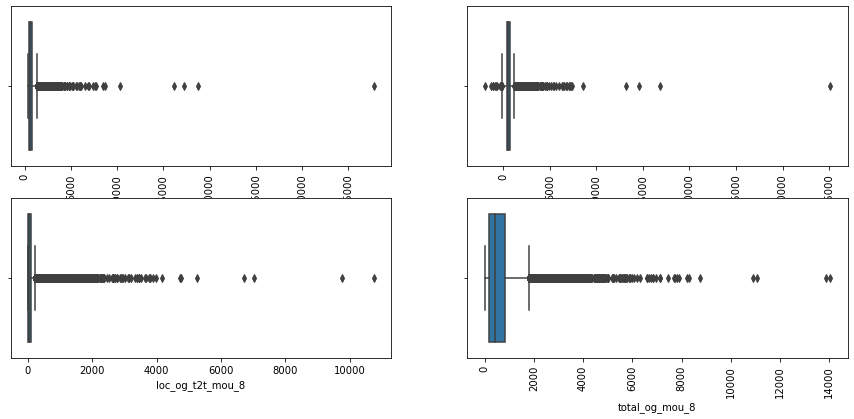

In [50]:
plt.figure(figsize = [15,10])                          # Box plots of numerical columns before clipping outliers.
plt.subplot(3,2,1)
sns.boxplot(df['total_rech_amt_good_phase'])
plt.xticks(rotation=90)
plt.subplot(3,2,2)
sns.boxplot(df['arpu_7'])
plt.xticks(rotation=90)
plt.subplot(3,2,3)
sns.boxplot(df['loc_og_t2t_mou_8'])
plt.subplot(3,2,4)
sns.boxplot(df['total_og_mou_8'])
plt.xticks(rotation=90)
plt.show()

In [51]:
# From the above table we can see that there is a lot of difference between minimum and 1% and between 95% and maximum.
# So these outliers should be capped with 1% and 95%.

In [52]:
df_num=df.select_dtypes(include=['int64','float64'])    # All numerical columns
df_num.shape

(30011, 86)

In [53]:
for i in df_num.columns:           # capping with lower(1%) and upper(95%) values for all numerical values.
    lower=df[i].quantile(0.01)
    upper=df[i].quantile(0.95)
    df[i][df[i] >upper] = upper
    df[i][df[i] <lower] = lower

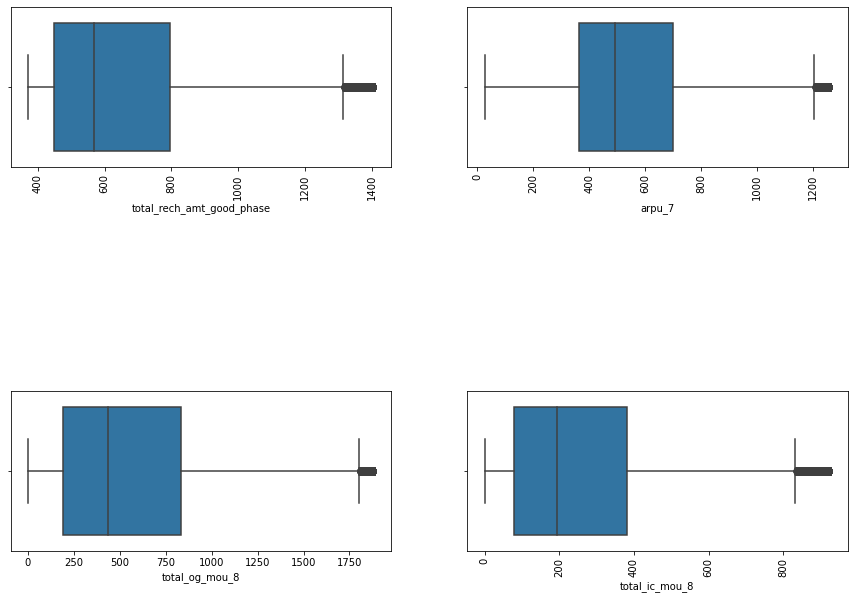

In [54]:
plt.figure(figsize = [15,10])                         # Box plots of numerical columns after clipping outliers.
plt.subplot(3,2,1)
sns.boxplot(df['total_rech_amt_good_phase'])
plt.xticks(rotation=90)
plt.subplot(3,2,2)
sns.boxplot(df['arpu_7'])
plt.xticks(rotation=90)
plt.subplot(3,2,5)
sns.boxplot(df['total_og_mou_8'])
plt.subplot(3,2,6)
sns.boxplot(df['total_ic_mou_8'])
plt.xticks(rotation=90)
plt.show()

In [55]:
# From the two plots we can see that many outliers were handled by capping.

# Exploratory Data Analysis:

## Univariate Analysis:

In [56]:
df.head()          # Top n rows of dataframe.

total_rech_amt_good_phase     arpu_6     arpu_7     arpu_8  onnet_mou_6  \
7                  1185.00000 1069.18000 1261.42150 1258.55550     57.84000   
8                   519.00000  378.72100  492.22300  137.36200    413.69000   
13                  380.00000  492.84600  205.67100  593.26000    501.76000   
16                  459.00000  430.97500  299.86900  187.89400     50.51000   
17                  408.00000  690.00800   25.78270   25.49900   1153.97000   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7      54.68000     52.29000     453.43000     567.16000     325.91000   
8     351.03000     35.08000      94.66000      80.63000     136.48000   
13    108.39000    534.24000     413.31000     119.28000     482.46000   
16     74.01000     70.61000     296.29000     229.74000     162.76000   
17      9.28000      7.79000      61.64000       1.11200       5.54000   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7           51.39000          31.38000          40.28000         308.63000   
8          297.13000         217.59000          12.49000          80.96000   
13          49.63000           6.19000          36.01000         151.13000   
16          42.61000          65.16000          67.38000         273.29000   
17          38.99000           0.00000           0.00000          58.54000   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7          447.38000         162.28000          33.59500          34.08500   
8           70.58000          50.54000           0.00000           0.00000   
13          47.28000         294.46000           4.54000           0.00000   
16         145.99000         128.28000           0.00000           4.48000   
17           0.00000           0.00000           0.00000           0.00000   

    loc_og_t2f_mou_8  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7           31.31000           0.00000           0.00000     422.16000   
8            0.00000           0.00000           7.15000     378.09000   
13          23.51000           0.00000           0.49000     205.31000   
16          10.26000           0.00000           0.00000     315.91000   
17           0.00000           0.00000           0.00000      97.54000   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7      533.91000     255.79000           4.30000          23.29000   
8      288.18000      63.04000         116.56000         133.43000   
13      53.48000     353.99000         446.41000          85.98000   
16     215.64000     205.93000           7.89000           2.58000   
17       0.00000       0.00000         986.24500           0.81000   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
7           12.01000          49.89000          31.76000          49.14000   
8           22.58000          13.69000          10.04000          75.69000   
13         498.23000         255.36000          52.94000         156.94000   
16           3.23000          22.99000          64.51000          18.29000   
17           0.00000           1.55000           0.00000           0.00000   

    std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
7       60.86000      75.14000      77.84000       4.50000       0.00000   
8      130.26000     143.48000      98.28000       0.00000       0.00000   
13     701.78000     138.93000     655.18000       0.00000       0.00000   
16      30.89000      67.09000      21.53000       0.00000       3.26000   
17    1148.46000       0.81000       0.00000       2.58000       0.00000   

    spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
7        6.50000       487.53000       609.24000       350.16000   
8       10.23000       508.36000       431.66000       171.56000   
13       4.78000       907.09000       192.41000      1015.26000   
16       5.91000       346.81000       286.01000       233.38000   
17       0.000

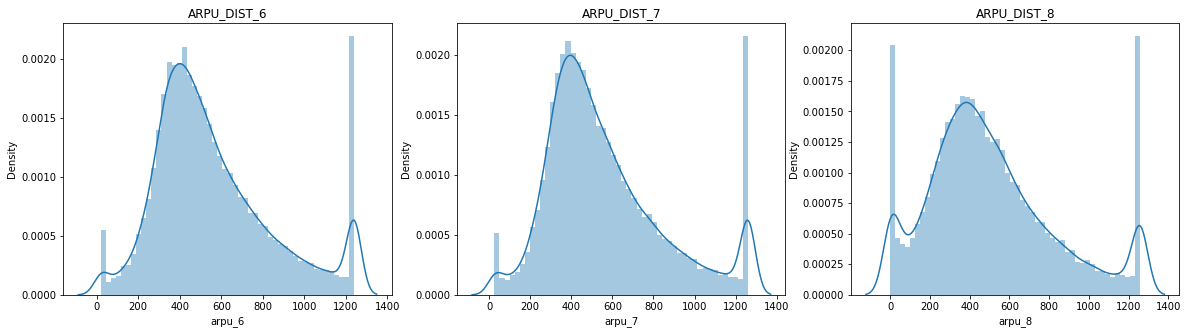

In [57]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.distplot(df.arpu_6)
plt.title('ARPU_DIST_6')
plt.subplot(1,3,2)
sns.distplot(df.arpu_7)
plt.title('ARPU_DIST_7')
plt.subplot(1,3,3)
sns.distplot(df.arpu_8)
plt.title('ARPU_DIST_8')
plt.show()

#### **observation:** Average revenue per user was almost same and decreased in month 8 

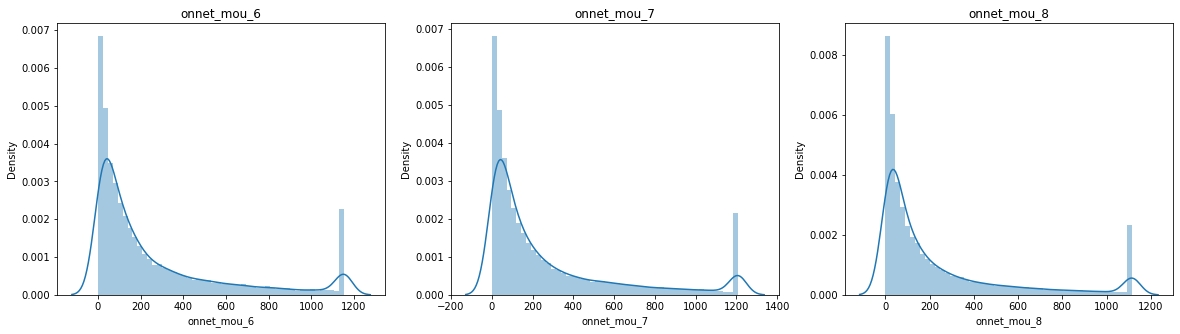

In [58]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.distplot(df.onnet_mou_6)
plt.title('onnet_mou_6')
plt.subplot(1,3,2)
sns.distplot(df.onnet_mou_7)
plt.title('onnet_mou_7')
plt.subplot(1,3,3)
sns.distplot(df.onnet_mou_8)
plt.title('onnet_mou_8')
plt.show()

#### Observation : mou for onnet has more lesser values in month 8 than 6 and 7

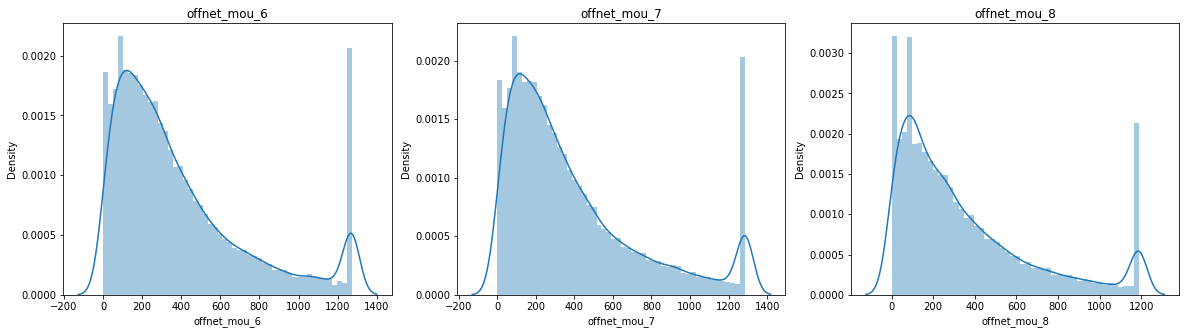

In [59]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.distplot(df.offnet_mou_6)
plt.title('offnet_mou_6')
plt.subplot(1,3,2)
sns.distplot(df.offnet_mou_7)
plt.title('offnet_mou_7')
plt.subplot(1,3,3)
sns.distplot(df.offnet_mou_8)
plt.title('offnet_mou_8')
plt.show()

#### Observation : mou for offnet also follows the same pattern as mou for onnet

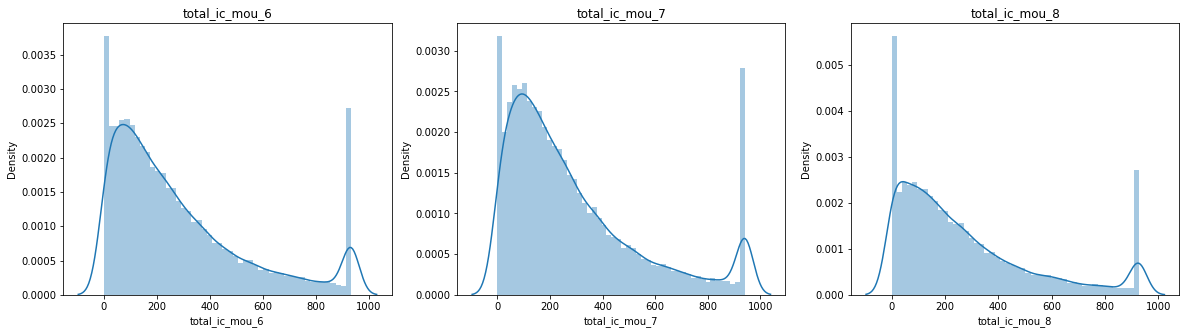

In [60]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.distplot(df.total_ic_mou_6)
plt.title('total_ic_mou_6')
plt.subplot(1,3,2)
sns.distplot(df.total_ic_mou_7)
plt.title('total_ic_mou_7')
plt.subplot(1,3,3)
sns.distplot(df.total_ic_mou_8)
plt.title('total_ic_mou_8')
plt.show()

#### Observation : peak value for total_ic_mou has been significantly reduced in the eight month

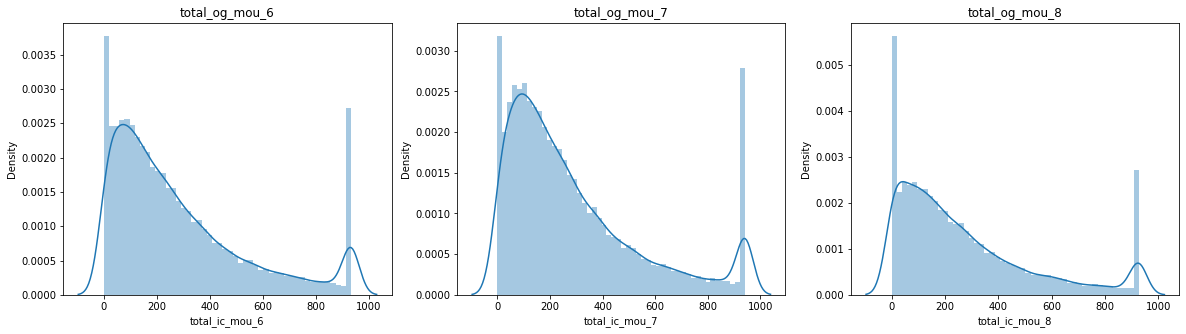

In [61]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.distplot(df.total_ic_mou_6)
plt.title('total_og_mou_6')
plt.subplot(1,3,2)
sns.distplot(df.total_ic_mou_7)
plt.title('total_og_mou_7')
plt.subplot(1,3,3)
sns.distplot(df.total_ic_mou_8)
plt.title('total_og_mou_8')
plt.show()

#### Observation : peak value for total_og_mou has been significantly reduced in the eight month

## Bivariate Analysis:

In [62]:
df.head()            # top n rows of dataframe.

total_rech_amt_good_phase     arpu_6     arpu_7     arpu_8  onnet_mou_6  \
7                  1185.00000 1069.18000 1261.42150 1258.55550     57.84000   
8                   519.00000  378.72100  492.22300  137.36200    413.69000   
13                  380.00000  492.84600  205.67100  593.26000    501.76000   
16                  459.00000  430.97500  299.86900  187.89400     50.51000   
17                  408.00000  690.00800   25.78270   25.49900   1153.97000   

    onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7      54.68000     52.29000     453.43000     567.16000     325.91000   
8     351.03000     35.08000      94.66000      80.63000     136.48000   
13    108.39000    534.24000     413.31000     119.28000     482.46000   
16     74.01000     70.61000     296.29000     229.74000     162.76000   
17      9.28000      7.79000      61.64000       1.11200       5.54000   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7           51.39000          31.38000          40.28000         308.63000   
8          297.13000         217.59000          12.49000          80.96000   
13          49.63000           6.19000          36.01000         151.13000   
16          42.61000          65.16000          67.38000         273.29000   
17          38.99000           0.00000           0.00000          58.54000   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7          447.38000         162.28000          33.59500          34.08500   
8           70.58000          50.54000           0.00000           0.00000   
13          47.28000         294.46000           4.54000           0.00000   
16         145.99000         128.28000           0.00000           4.48000   
17           0.00000           0.00000           0.00000           0.00000   

    loc_og_t2f_mou_8  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
7           31.31000           0.00000           0.00000     422.16000   
8            0.00000           0.00000           7.15000     378.09000   
13          23.51000           0.00000           0.49000     205.31000   
16          10.26000           0.00000           0.00000     315.91000   
17           0.00000           0.00000           0.00000      97.54000   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
7      533.91000     255.79000           4.30000          23.29000   
8      288.18000      63.04000         116.56000         133.43000   
13      53.48000     353.99000         446.41000          85.98000   
16     215.64000     205.93000           7.89000           2.58000   
17       0.00000       0.00000         986.24500           0.81000   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
7           12.01000          49.89000          31.76000          49.14000   
8           22.58000          13.69000          10.04000          75.69000   
13         498.23000         255.36000          52.94000         156.94000   
16           3.23000          22.99000          64.51000          18.29000   
17           0.00000           1.55000           0.00000           0.00000   

    std_og_mou_6  std_og_mou_7  std_og_mou_8  spl_og_mou_6  spl_og_mou_7  \
7       60.86000      75.14000      77.84000       4.50000       0.00000   
8      130.26000     143.48000      98.28000       0.00000       0.00000   
13     701.78000     138.93000     655.18000       0.00000       0.00000   
16      30.89000      67.09000      21.53000       0.00000       3.26000   
17    1148.46000       0.81000       0.00000       2.58000       0.00000   

    spl_og_mou_8  total_og_mou_6  total_og_mou_7  total_og_mou_8  \
7        6.50000       487.53000       609.24000       350.16000   
8       10.23000       508.36000       431.66000       171.56000   
13       4.78000       907.09000       192.41000      1015.26000   
16       5.91000       346.81000       286.01000       233.38000   
17       0.000

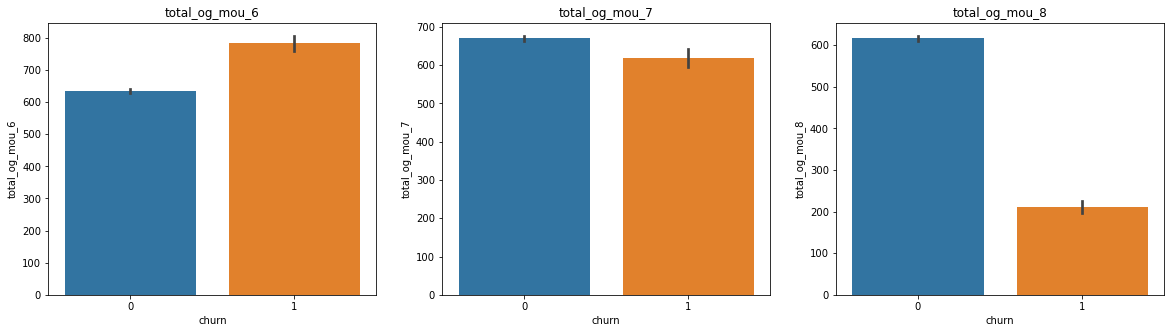

In [63]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.barplot(df.churn,df.total_og_mou_6)
plt.title('total_og_mou_6')
plt.subplot(1,3,2)
sns.barplot(df.churn,df.total_og_mou_7)
plt.title('total_og_mou_7')
plt.subplot(1,3,3)
sns.barplot(df.churn,df.total_og_mou_8)
plt.title('total_og_mou_8')
plt.show()

#### Observation : churn people have higher mou in good phase and significantly less mou in month 8

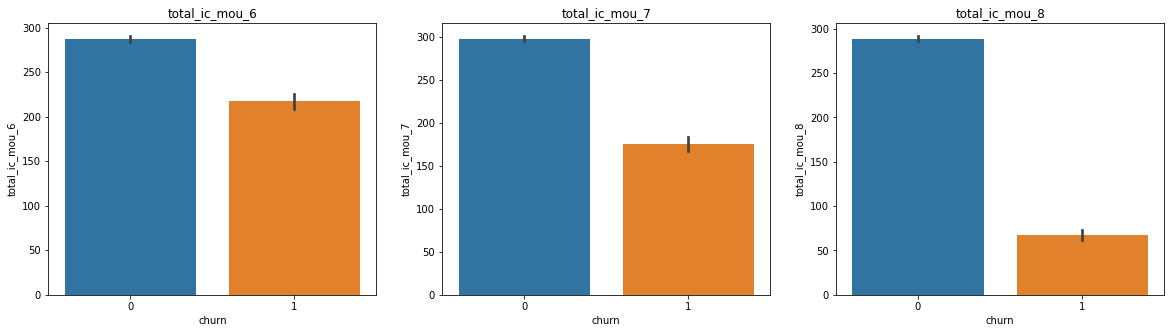

In [64]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.barplot(df.churn,df.total_ic_mou_6)
plt.title('total_ic_mou_6')
plt.subplot(1,3,2)
sns.barplot(df.churn,df.total_ic_mou_7)
plt.title('total_ic_mou_7')
plt.subplot(1,3,3)
sns.barplot(df.churn,df.total_ic_mou_8)
plt.title('total_ic_mou_8')
plt.show()

#### Observation : Churn customers have less mou incoming then compared to non churn people

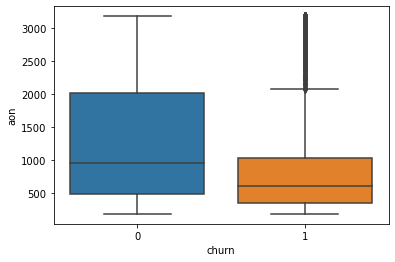

In [65]:
sns.boxplot(df.churn,df.aon)
plt.show()

#### Observation : Customers whose age on network are less  likely to churn

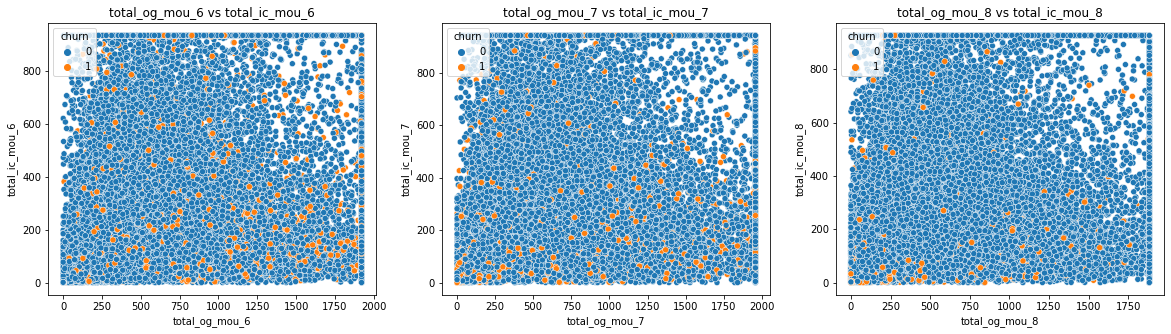

In [66]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.scatterplot(df.total_og_mou_6,df.total_ic_mou_6,hue = df.churn)
plt.title('total_og_mou_6 vs total_ic_mou_6')
plt.subplot(1,3,2)
sns.scatterplot(df.total_og_mou_7,df.total_ic_mou_7,hue = df.churn)
plt.title('total_og_mou_7 vs total_ic_mou_7')
plt.subplot(1,3,3)
sns.scatterplot(df.total_og_mou_8,df.total_ic_mou_8,hue = df.churn)
plt.title('total_og_mou_8 vs total_ic_mou_8')
plt.show()

#### Observation : customers with high total_og_mou and total_ic_mou in eight month are less likely to churn.

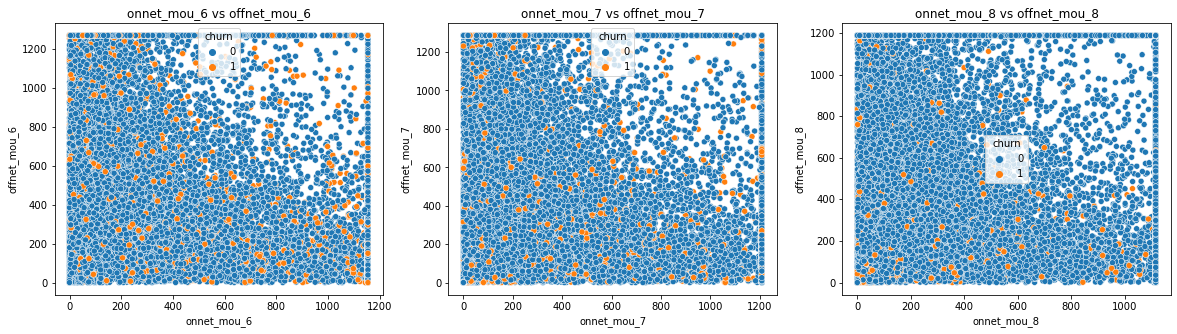

In [67]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.scatterplot(df.onnet_mou_6,df.offnet_mou_6,hue = df.churn)
plt.title('onnet_mou_6 vs offnet_mou_6')
plt.subplot(1,3,2)
sns.scatterplot(df.onnet_mou_7,df.offnet_mou_7,hue = df.churn)
plt.title('onnet_mou_7 vs offnet_mou_7')
plt.subplot(1,3,3)
sns.scatterplot(df.onnet_mou_8,df.offnet_mou_8,hue = df.churn)
plt.title('onnet_mou_8 vs offnet_mou_8')
plt.show()

#### Observation : customers with high onnet_mou and offnet_mou in eight month are less likely to churn.

# Dimensionality Reduction:

In [68]:
df.shape   # it is difficult to perform modelling on 89 variables.

(30011, 89)

## Correlation technique:

In [69]:
# identify the variables which have insignificant correlation with target variable.

insig_cols=[]
for i in df_num.columns:
    if abs(df[i].corr(df['churn']))<0.085:
        insig_cols.append(i)
print(len(insig_cols))

42


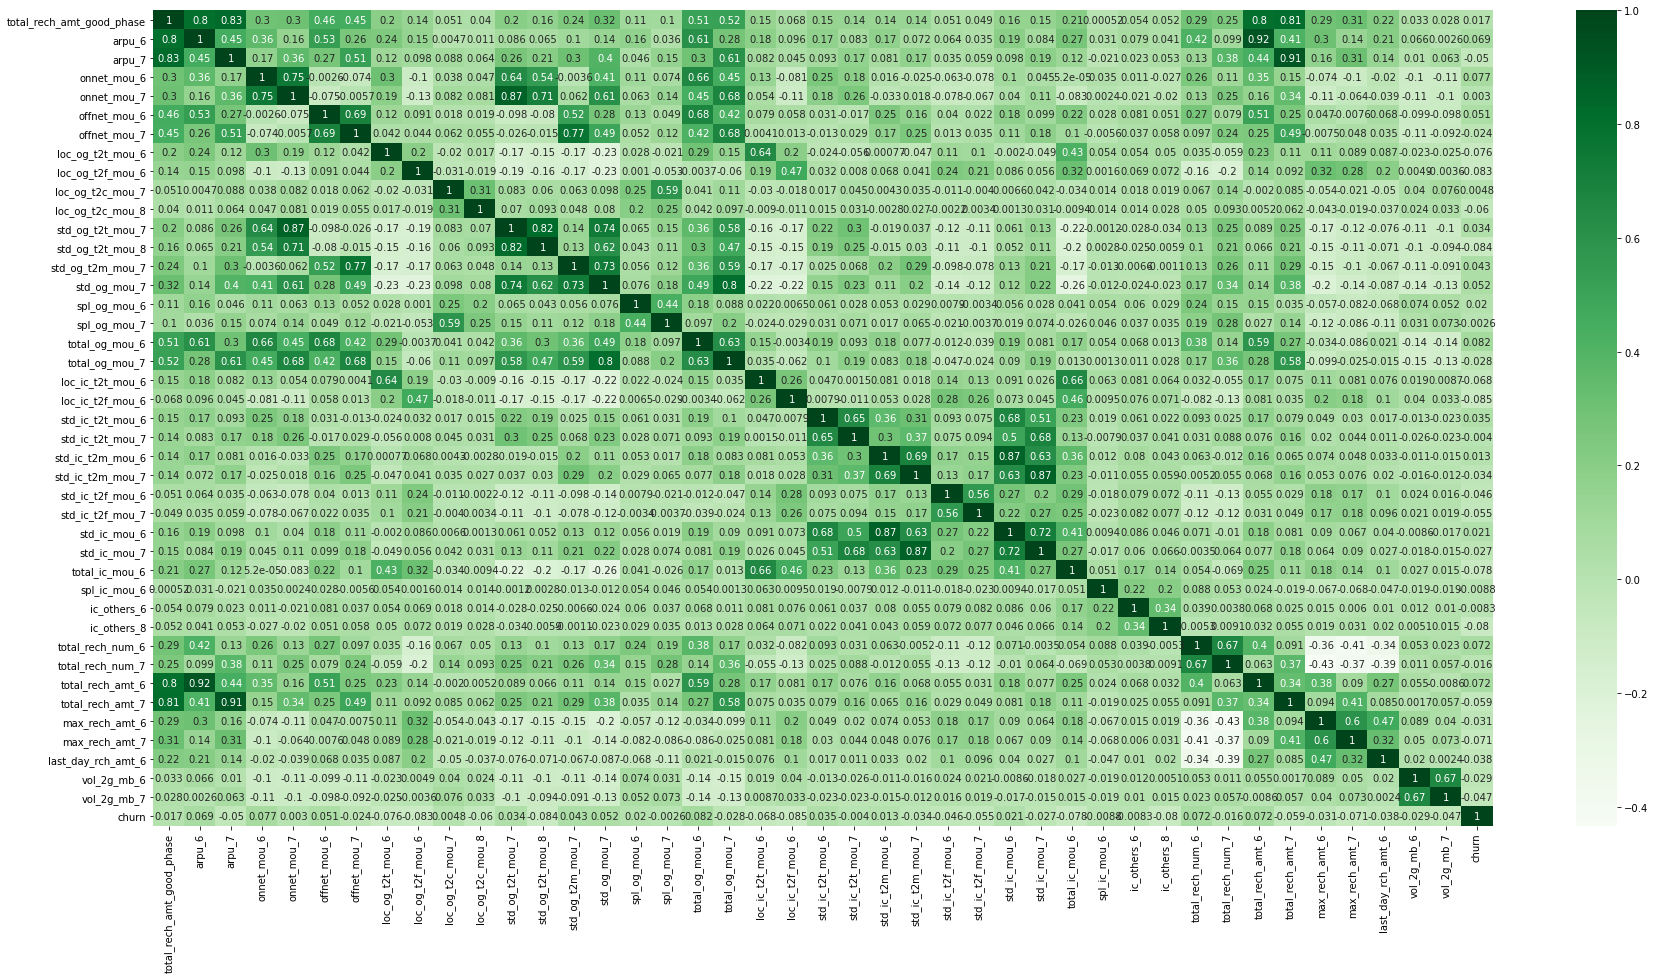

In [70]:
df_insig=df[insig_cols]
df_insig['churn']=df.churn             # heat map to plot correlation matrix.
plt.figure(figsize=[30,15])
sns.heatmap(df_insig.corr(),annot=True,cmap='Greens')
plt.show()

In [71]:
# In the above heat map we can see that all the above columns have very insignificant correlation with target variable.
# So we can drop them from the dataframe.

df.drop(insig_cols,axis=1,inplace=True)

In [72]:
df.head()            # top n rows of dataframe.

arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7  1258.55550     52.29000     325.91000          31.38000          40.28000   
8   137.36200     35.08000     136.48000         217.59000          12.49000   
13  593.26000    534.24000     482.46000           6.19000          36.01000   
16  187.89400     70.61000     162.76000          65.16000          67.38000   
17   25.49900      7.79000       5.54000           0.00000           0.00000   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_7  \
7          308.63000         447.38000         162.28000          34.08500   
8           80.96000          70.58000          50.54000           0.00000   
13         151.13000          47.28000         294.46000           0.00000   
16         273.29000         145.99000         128.28000           4.48000   
17          58.54000           0.00000           0.00000           0.00000   

    loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7           31.31000     422.16000     533.91000     255.79000   
8            0.00000     378.09000     288.18000      63.04000   
13          23.51000     205.31000      53.48000     353.99000   
16          10.26000     315.91000     215.64000     205.93000   
17           0.00000      97.54000       0.00000       0.00000   

    std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2m_mou_8  std_og_mou_6  \
7            4.30000          49.89000          49.14000      60.86000   
8          116.56000          13.69000          75.69000     130.26000   
13         446.41000         255.36000         156.94000     701.78000   
16           7.89000          22.99000          18.29000      30.89000   
17         986.24500           1.55000           0.00000    1148.46000   

    std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_7  \
7       77.84000       6.50000       350.16000          32.26000   
8       98.28000      10.23000       171.56000           9.84000   
13     655.18000       4.78000      1015.26000           7.58000   
16      21.53000       5.91000       233.38000          71.44000   
17       0.00000       0.00000         0.00000           0.00000   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
7           27.31000         217.56000         221.49000         121.19000   
8            0.31000          57.58000          13.98000          15.48000   
13          52.58000         142.88000          18.53000         195.18000   
16          28.89000         226.81000         149.69000         150.16000   
17           0.00000          47.41000           2.31000           0.00000   

    loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
7           76.04500          39.53000     427.88000     355.23000   
8            0.00000           0.00000      81.43000      23.83000   
13           0.00000           7.49000     215.58000      26.11000   
16           8.68000          32.71000     276.86000     229.83000   
17           0.00000           0.00000      81.96000       2.31000   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7      188.04000          30.39000         121.87500          10.98000   
8       15.79000           0.10000           0.65000           0.00000   
13     255.26000          61.56000         121.87500           1.91000   
16     211.78000           6.33000          73.93000           2.18000   
17       0.00000           0.00000           0.00000           0.00000   

    std_ic_mou_8  total_ic_mou_7  total_ic_mou_8  total_rech_num_8  \
7      191.95500       558.04000       428.74000                 7   
8        0.75000        28.49000        16.54000                14   
13     191.95500       172.58000       926.56000                11   
16      82.44000       381.56000       294.46000                 2   
17       0.00000         2.31000         0.00000                 4   

    total_rech_amt_8  max_rech_amt_8 date_of_last_

In [73]:
df.shape             # shape of the dataframe.

(30011, 47)

## Principal Component Analysis:

In [74]:
X=df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','churn'],axis=1)
X.head()                             # Dropping non numerical and target columns columns

arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7  1258.55550     52.29000     325.91000          31.38000          40.28000   
8   137.36200     35.08000     136.48000         217.59000          12.49000   
13  593.26000    534.24000     482.46000           6.19000          36.01000   
16  187.89400     70.61000     162.76000          65.16000          67.38000   
17   25.49900      7.79000       5.54000           0.00000           0.00000   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_7  \
7          308.63000         447.38000         162.28000          34.08500   
8           80.96000          70.58000          50.54000           0.00000   
13         151.13000          47.28000         294.46000           0.00000   
16         273.29000         145.99000         128.28000           4.48000   
17          58.54000           0.00000           0.00000           0.00000   

    loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7           31.31000     422.16000     533.91000     255.79000   
8            0.00000     378.09000     288.18000      63.04000   
13          23.51000     205.31000      53.48000     353.99000   
16          10.26000     315.91000     215.64000     205.93000   
17           0.00000      97.54000       0.00000       0.00000   

    std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2m_mou_8  std_og_mou_6  \
7            4.30000          49.89000          49.14000      60.86000   
8          116.56000          13.69000          75.69000     130.26000   
13         446.41000         255.36000         156.94000     701.78000   
16           7.89000          22.99000          18.29000      30.89000   
17         986.24500           1.55000           0.00000    1148.46000   

    std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_7  \
7       77.84000       6.50000       350.16000          32.26000   
8       98.28000      10.23000       171.56000           9.84000   
13     655.18000       4.78000      1015.26000           7.58000   
16      21.53000       5.91000       233.38000          71.44000   
17       0.00000       0.00000         0.00000           0.00000   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
7           27.31000         217.56000         221.49000         121.19000   
8            0.31000          57.58000          13.98000          15.48000   
13          52.58000         142.88000          18.53000         195.18000   
16          28.89000         226.81000         149.69000         150.16000   
17           0.00000          47.41000           2.31000           0.00000   

    loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
7           76.04500          39.53000     427.88000     355.23000   
8            0.00000           0.00000      81.43000      23.83000   
13           0.00000           7.49000     215.58000      26.11000   
16           8.68000          32.71000     276.86000     229.83000   
17           0.00000           0.00000      81.96000       2.31000   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7      188.04000          30.39000         121.87500          10.98000   
8       15.79000           0.10000           0.65000           0.00000   
13     255.26000          61.56000         121.87500           1.91000   
16     211.78000           6.33000          73.93000           2.18000   
17       0.00000           0.00000           0.00000           0.00000   

    std_ic_mou_8  total_ic_mou_7  total_ic_mou_8  total_rech_num_8  \
7      191.95500       558.04000       428.74000                 7   
8        0.75000        28.49000        16.54000                14   
13     191.95500       172.58000       926.56000                11   
16      82.44000       381.56000       294.46000                 2   
17       0.00000         2.31000         0.00000                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch

In [75]:
X.shape             # Shape of the dataframe

(30011, 43)

In [76]:
y=df['churn']            # Seperating target variable.
y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [77]:
y.shape           # Shape of the target variable.

(30011,)

### Train-Test Split:

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=100)

# Splitted data into training and test data sets.

In [79]:
print(X_train.shape)
print(y_train.shape)             # checking if the shapes of train and test sets are compatible.
print(X_test.shape)
print(y_test.shape)

(21007, 43)
(21007,)
(9004, 43)
(9004,)


### Scaling:

In [80]:
scaler = StandardScaler()     # creating a standard scaler object

In [81]:
columns=X.select_dtypes(include=np.number).columns  # seperating numerical columns for scaling.

X_train[columns] = scaler.fit_transform(X_train[columns])      # fitting and transforming data set X_train  with standard scaler

In [82]:
X_train.head()                   # scaled data

arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
4715  -0.38071      0.62298      -0.79373          -0.73558          -0.65040   
15222 -0.08775     -0.33612      -0.54255          -0.47153           0.75605   
60145  0.16933     -0.48764       0.21063           0.13531           0.22447   
62445  0.11384     -0.41080       1.46639           3.00158           0.46224   
88349 -0.72164     -0.55594      -0.52410          -0.44445          -0.52859   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_7  \
4715           -0.94237          -0.96130          -0.90869          -0.55124   
15222           0.16673          -0.47150          -0.25112           2.76467   
60145           0.22642           2.12170           1.56390           0.26983   
62445           0.03482           0.05885          -0.23306          -0.55124   
88349           0.40229          -0.33829          -0.36976          -0.55124   

       loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
4715           -0.54308      -0.97521      -0.98542      -0.90628   
15222           3.15110       0.26755      -0.44569       0.24496   
60145          -0.35902      -0.08774       1.40198       1.04618   
62445          -0.49234       0.35196       1.29047      -0.06682   
88349           0.60494       0.00335      -0.46733      -0.46705   

       std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2m_mou_8  std_og_mou_6  \
4715            0.62567          -0.16849          -0.23931       0.22192   
15222          -0.57577          -0.63401          -0.59412      -0.76892   
60145          -0.57577          -0.63401          -0.59256      -0.76892   
62445          -0.57577           1.13303           2.28492       0.24768   
88349          -0.23785           0.27743          -0.28790      -0.04118   

       std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_7  \
4715        0.42556      -0.25314        -0.12795          -0.74165   
15222      -0.70134      -0.18171        -0.54253          -0.67644   
60145      -0.70049      -0.60199        -0.16307          -0.00171   
62445       0.88071      -0.60199         0.65951          -0.76863   
88349      -0.43339      -0.59842        -0.66045           0.31461   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
4715           -0.80053          -0.93955          -0.87814          -0.96105   
15222          -0.22917           2.36156           0.64040           0.74945   
60145          -0.14270          -0.25627           0.88126           0.26823   
62445          -0.76912          -0.77872          -0.93257          -0.90116   
88349          -0.31691           0.06541          -0.52025           0.07808   

       loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
4715           -0.58592          -0.58467      -0.99300      -0.92959   
15222           1.30958           3.13528       1.75467       0.27913   
60145          -0.34683          -0.51419      -0.39689       0.48641   
62445           0.62822          -0.21631      -0.84551      -0.85775   
88349          -0.53919          -0.58467      -0.16988      -0.36513   

       loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
4715       -0.99739           3.20237           2.65876          -0.39310   
15222       1.12001          -0.53647          -0.63978          -0.24884   
60145       0.03080          -0.53647          -0.63978          -0.39310   
62445      -0.91593           0.03140           0.70858           0.17672   
88349      -0.15515          -0.49517           0.08875          -0.39310   

       std_ic_mou_8  total_ic_mou_7  total_ic_mou_8  total_rech_num_8  \
4715        2.65194        -0.52593        -0.36947           2.10370   
15222      -0.67986         0.05524         0.75650          -0.91240   
60145      -0.68769         2.58172         1.98224           0.73275   
62445       0.39150        -0.81384        -0.75

In [83]:
X_test[columns]=scaler.transform(X_test[columns]) 
# Do not fit X_test to scaler.Model should never know our test data. So we use transform() for test data.

In [84]:
X_test.head()                 # top n rows of dataframe.

arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
29360 -1.58930     -0.75507      -1.05152          -0.60366          -0.72813   
49979 -1.03924      0.08423      -0.84608          -0.37909          -0.31997   
90612  0.30316     -0.75196      -0.95817          -0.75766          -0.70287   
87007 -0.05759     -0.72535      -0.42326          -0.51068          -0.60953   
91852 -0.69256      2.88608      -1.06274           3.00158           2.97324   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_7  \
29360          -0.27977          -0.57705          -0.91129          -0.11181   
49979          -0.92042          -0.82619          -0.90735          -0.55124   
90612          -0.85630          -0.87137          -0.75725          -0.06274   
87007           0.51224           0.93937           0.28678           2.12679   
91852          -0.87220          -0.93857          -0.91693          -0.55124   

       loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
29360          -0.54308      -0.47172      -0.66722      -0.93518   
49979          -0.54308      -0.77969      -0.76693      -0.78969   
90612           0.47279      -0.88667      -0.91620      -0.78953   
87007           0.42324       0.10103       0.45197      -0.06614   
91852          -0.54308       2.62214       2.61331       2.60395   

       std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2m_mou_8  std_og_mou_6  \
29360          -0.55735           2.96693          -0.58006       2.59151   
49979           2.95801           0.88942          -0.37020       2.44571   
90612          -0.57577          -0.63401          -0.59412      -0.76892   
87007          -0.57577          -0.62891          -0.59412      -0.76599   
91852          -0.57577          -0.63401          -0.58879      -0.76892   

       std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_7  \
29360      -0.69084      -0.28886        -1.10088           0.29658   
49979      -0.08675       1.08034        -0.49031          -0.78481   
90612      -0.70134      -0.60199        -1.04515          -0.74782   
87007      -0.70134       0.39574        -0.68231          -0.54387   
91852      -0.69842      -0.60199         1.79755          -0.55081   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
29360          -0.48399           0.15646           0.17692           0.07687   
49979          -0.82671          -0.81172          -0.76693          -0.98295   
90612          -0.68217           0.46184          -0.34858           0.26958   
87007          -0.54825           1.08848           1.49342           0.87029   
91852          -0.57031           1.01184           0.07707          -0.00427   

       loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
29360           0.59772          -0.01148      -0.00424       0.20065   
49979          -0.58592          -0.58467      -0.66376      -0.86905   
90612           0.01968          -0.39030      -0.01689      -0.52223   
87007          -0.45506          -0.25375       0.54778       0.71663   
91852          -0.19088          -0.29339       0.48001      -0.19984   

       loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
29360      -0.15653          -0.19878           0.74064          -0.39310   
49979      -1.01998          -0.38281          -0.30758          -0.39310   
90612      -0.11934          -0.53647          -0.63978          -0.39310   
87007       0.33569          -0.53647          -0.61230          -0.39310   
91852      -0.26115          -0.53647          -0.61658           2.78415   

       std_ic_mou_8  total_ic_mou_7  total_ic_mou_8  total_rech_num_8  \
29360       0.30707         0.05240        -0.14467          -1.32368   
49979      -0.42500        -0.11619        -1.00632          -0.77530   
90612      -0.68769        -0.66941        -0.31378          -0.50111   
87007      -0.67006         0.43470         0.06

### PCA:

In [85]:
pca = PCA(random_state=42)         # PCA object is created.

In [86]:
pca.fit(X_train)                          # fitting dataframe into pca.

PCA(random_state=42)

In [87]:
pca.components_            # components of pca

array([[ 0.11290518,  0.01330166,  0.09554085, ...,  0.0882773 ,
         0.0137063 ,  0.09507224],
       [ 0.2871618 ,  0.25957122,  0.2857853 , ...,  0.04972276,
        -0.01374529, -0.07233397],
       [ 0.00619369, -0.12900165, -0.04804919, ...,  0.11947709,
         0.06216501,  0.07062358],
       ...,
       [-0.01386242, -0.03774404,  0.20646605, ..., -0.00034581,
         0.00112566,  0.00028794],
       [ 0.00238261, -0.03474692,  0.06693674, ...,  0.00332592,
         0.00095093,  0.00142596],
       [ 0.00489741,  0.01664015, -0.06579064, ..., -0.00047215,
        -0.00097773,  0.00056023]])

In [88]:
pca.explained_variance_ratio_                 # variance ratios of pca

array([3.04329990e-01, 1.34333791e-01, 6.61086821e-02, 6.02813567e-02,
       4.96323831e-02, 4.06669171e-02, 3.63914256e-02, 3.39241450e-02,
       3.32625611e-02, 2.25905110e-02, 1.99805778e-02, 1.99219152e-02,
       1.82641888e-02, 1.76118426e-02, 1.65974978e-02, 1.49119522e-02,
       1.31851898e-02, 1.25924998e-02, 1.21258743e-02, 1.11140786e-02,
       1.01576458e-02, 6.94292891e-03, 5.91966497e-03, 5.52105227e-03,
       5.03567238e-03, 4.49709084e-03, 4.05009852e-03, 3.80970610e-03,
       3.24716357e-03, 2.16515460e-03, 1.90877872e-03, 1.26167438e-03,
       1.20203508e-03, 1.18250155e-03, 1.00402949e-03, 9.63691725e-04,
       8.40771188e-04, 7.00746165e-04, 5.01551008e-04, 4.80738573e-04,
       3.38193744e-04, 2.43912009e-04, 1.97819098e-04])

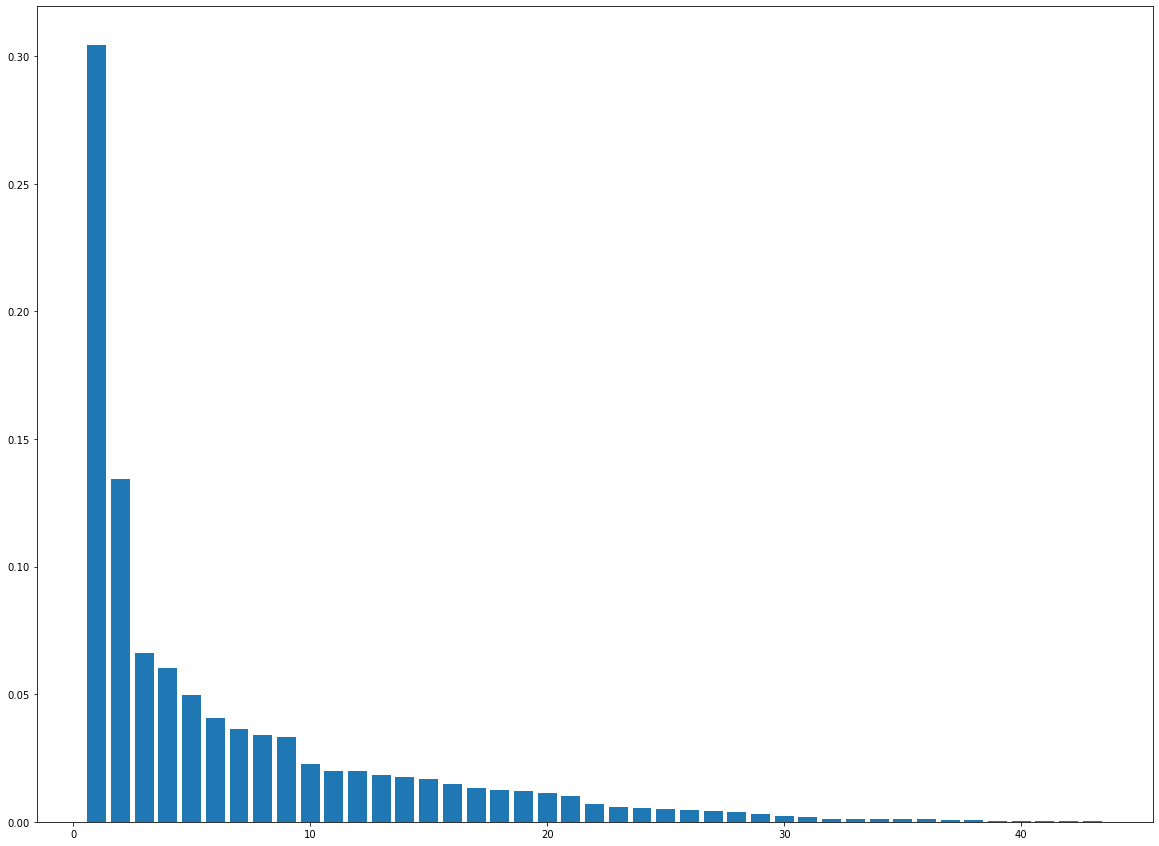

In [89]:
plt.figure(figsize=[20,15])                 # bar plot for variance ratios of pca
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

In [90]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)     # cummulative sum of variance explained

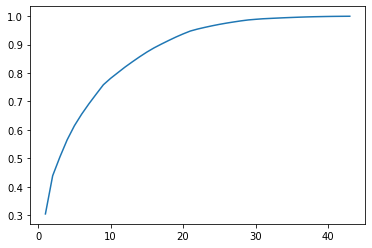

In [91]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)               # Scree plot to identify the optimal value of n_components.

#### From the above scree plot we can identify that 25 is the optimal number for components in PCA.

In [92]:
pc25 = PCA(n_components=25, random_state=42)            # Fitting data into pca with optimal hyperparameters

In [93]:
df_pca = pc25.fit_transform(X_train)                # converting pca25 on X_train result into dataframe


pca_col=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16'
        ,'pca17','pca18','pca19','pca20','pca21','pca22','pca23','pca24','pca25']


X_train_pca=pd.DataFrame(df_pca,columns=pca_col)


X_train_pca.head()

pca1     pca2     pca3     pca4     pca5     pca6     pca7     pca8  \
0 -3.83727  2.00645  2.43337 -2.01889  1.13708 -2.20561 -1.09727 -2.79968   
1  3.07515 -2.57385  2.37517  1.67004 -0.42206  2.81854  1.49713 -0.02205   
2  2.71322 -1.01877 -1.25704 -0.14889 -0.89073 -1.09804  0.11277 -0.43415   
3 -0.99979  2.19293 -1.52109  0.55334 -0.71436 -0.43362 -2.48318  0.71189   
4 -1.52578 -1.31857 -0.46571 -1.18548 -0.66460 -0.32188 -0.27529 -0.09301   

      pca9    pca10    pca11    pca12    pca13    pca14    pca15    pca16  \
0 -0.60425 -0.57556 -1.10541 -0.63727  0.40951 -0.09976 -0.63909  0.38461   
1 -1.11740 -0.00848 -1.37551  0.51890  0.48402  0.39158 -0.37990 -0.43251   
2  0.11653 -1.47989 -0.35150 -0.42157 -0.40301 -0.37622  1.25201  0.10824   
3 -2.36807 -0.24491  0.97346 -1.78052 -0.71285 -0.41019 -1.13305  0.98568   
4 -0.43865 -0.20776 -0.79403 -0.03512  0.46797  0.78778  0.09969 -0.10386   

     pca17    pca18    pca19    pca20    pca21    pca22    pca23    pca24  \
0 -0.63192  0.12989  0.12249  0.13478 -0.68444  0.04056  0.10226 -0.10256   
1  1.25009  0.53197  2.42801  0.69871 -0.64211  0.44660 -0.42135 -0.31299   
2 -0.62456 -0.29499 -2.30899  0.28762 -0.68056 -0.51494  0.07934  0.02740   
3  0.37636 -0.30609 -0.67634  0.99510 -0.65555  1.27341  0.75039 -0.28391   
4 -0.00518  0.44921  0.45241 -0.44607 -0.27135 -0.26760 -0.17830 -0.69649   

     pca25  
0 -0.89172  
1 -0.03907  
2  0.40102  
3  0.45133  
4  0.12838

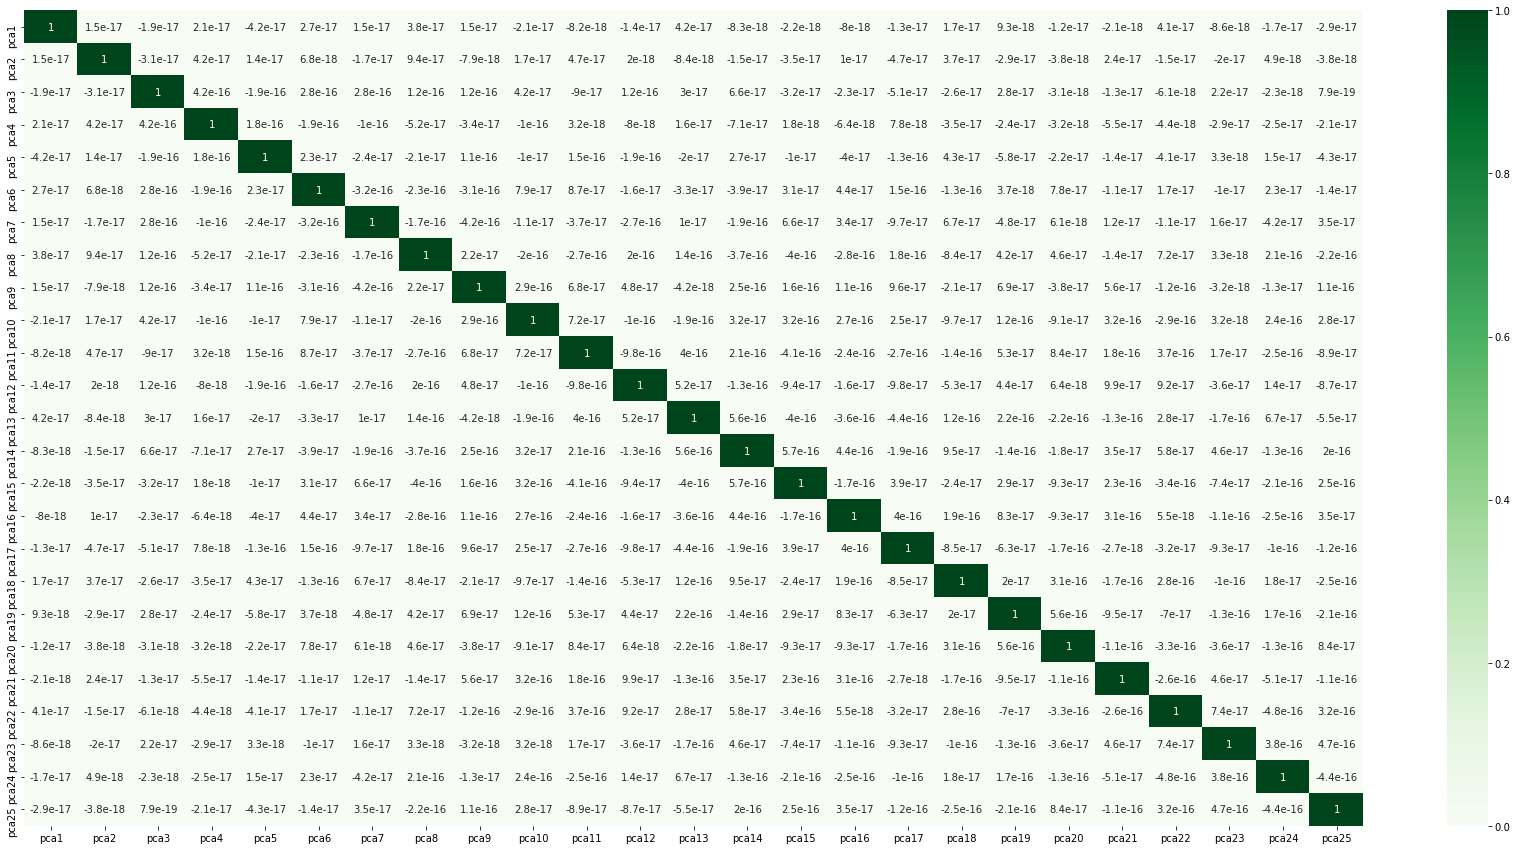

In [94]:
plt.figure(figsize=[30,15])                  # heat map to plot correlation matrix.
sns.heatmap(X_train_pca.corr(),annot=True,cmap='Greens')
plt.show()

#### From the above heatmap we can say that multi collinearity/variance between predictor variables has been handled well by pca.

In [95]:
# Transforming X_test using pca25.

X_test_pca = pc25.transform(X_test)                # converting pca25 on X_test result into dataframe


X_test_pca=pd.DataFrame(X_test_pca,columns=pca_col)


X_test_pca.head()

pca1     pca2     pca3     pca4     pca5     pca6     pca7     pca8  \
0 -2.31839 -1.57082  0.91355 -3.18293 -1.42707  1.69176 -1.76615  0.74312   
1 -3.97993  0.37605 -0.11268 -0.02921  0.76622  2.14086 -0.24819 -0.37475   
2 -1.39363 -2.05315  1.40280  2.12511  0.14726  0.06548  1.33804  0.94798   
3  1.50632 -1.73248 -0.49362 -0.55491 -1.82897 -0.25217  1.88394 -1.41009   
4  1.86575 -0.29844 -3.76563 -0.18617  3.08206 -0.11528 -1.92382 -1.40203   

      pca9    pca10    pca11    pca12    pca13   pca14    pca15    pca16  \
0 -0.25281  1.22874 -0.46437 -0.08450  0.13106 0.21682 -0.49179 -1.21661   
1  1.78581  1.43539  0.23980  0.94636 -0.27675 1.07662 -1.39975 -2.35608   
2  1.53254 -1.06797  0.17967 -0.43762 -1.35862 0.86062 -0.85208 -0.17455   
3 -1.11531 -1.05138 -1.00940  0.14710 -1.59666 1.37338  0.32156  1.13152   
4 -1.48623  0.18839  2.71480 -0.22933  1.83388 0.53044  0.29897  1.29632   

     pca17    pca18    pca19   pca20    pca21    pca22    pca23    pca24  \
0 -0.59328  0.20080 -0.19163 1.02920 -0.21698 -1.57333 -0.46237  0.45132   
1  0.33417 -0.13517 -1.13796 0.15917 -0.56067  0.85364  0.10513 -0.08949   
2  0.14732  0.19639  0.33409 0.51015 -0.90921  0.25905 -0.07000 -0.08881   
3 -0.10789  0.25534 -0.74488 0.61810 -1.04791 -0.12259  0.94712  0.40130   
4  2.12983  0.42314  1.50279 3.14627 -0.51963  0.05124 -0.17306  0.10841   

     pca25  
0  0.42341  
1 -0.58592  
2 -0.03544  
3 -0.66103  
4 -0.12856

# Logistic Regression Model:

In [96]:
#  First Logistic regression model summary
logm1 = sm.GLM(y_train.values.reshape(-1,1),(sm.add_constant(X_train_pca)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20981
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4206.9
Date:                Thu, 28 Jan 2021   Deviance:                       8413.8
Time:                        13:55:56   Pearson chi2:                 6.09e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7185      0.059    -62.588      0.000      -3.835      -3.602
pca1          -0.4405      0.017    -26.030      0.000      -0.474      -0.407
pca2          -0.2831      0.016    -17.908      0.000      -0.314      -0.252
pca3          -0.2050      0.030     -6.725      0.000      -0.265      -0.145
pca4          -0.2789      0.028     -9.887      0.000      -0.334      -0.224
pca5          -0.1932      0.031     -6.225      0.000      -0.254      -0.132
pca6           0.2503      0.032      7.756      0.000       0.187       0.314
pca7          -0.2913      0.034     -8.467      0.000      -0.359      -0.224
pca8          -0.0509      0.033     -1.565      0.118      -0.115       0.013
pca9           0.1133      0.037      3.098      0.002       0.042       0.185
pca10         -0.0467      0.046     -1.022      0.307      -0.136       0.043
pca11         -0.2501      0.052     -4.849      0.000      -0.351      -0.149
pca12          0.1809      0.043      4.211      0.000       0.097       0.265
pca13          0.1708      0.041      4.128      0.000       0.090       0.252
pca14          0.1081      0.048      2.274      0.023       0.015       0.201
pca15         -0.1444      0.046     -3.142      0.002      -0.235      -0.054
pca16          0.5365      0.042     12.830      0.000       0.455       0.618
pca17         -0.1977      0.048     -4.083      0.000      -0.293      -0.103
pca18          0.0253      0.051      0.495      0.621      -0.075       0.126
pca19         -0.2172      0.043     -5.024      0.000      -0.302      -0.132
pca20          0.2144      0.057      3.757      0.000       0.103       0.326
pca21          0.5036      0.052      9.676      0.000       0.402       0.606
pca22          0.0772      0.050      1.531      0.126      -0.022       0.176
pca23         -0.4246      0.070     -6.028      0.000      -0.563      -0.287
pca24          0.3182      0.078      4.054      0.000       0.164       0.472
pca25          0.9568      0.076     12.662      0.000       0.809       1.105
==============================================================================
"""

### Variance Inflation Factor:

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_pca.columns
vif['VIF'] = [variance_inflation_factor(X_train_pca.values, i) for i in range(X_train_pca.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0      pca1 1.00000
13    pca14 1.00000
23    pca24 1.00000
22    pca23 1.00000
21    pca22 1.00000
20    pca21 1.00000
19    pca20 1.00000
18    pca19 1.00000
17    pca18 1.00000
16    pca17 1.00000
15    pca16 1.00000
14    pca15 1.00000
12    pca13 1.00000
1      pca2 1.00000
11    pca12 1.00000
10    pca11 1.00000
9     pca10 1.00000
8      pca9 1.00000
7      pca8 1.00000
6      pca7 1.00000
5      pca6 1.00000
4      pca5 1.00000
3      pca4 1.00000
2      pca3 1.00000
24    pca25 1.00000

1.From the summary We can see that some variables have high p-values.
2.From the VIF table we can see that variables are not correlated with each other that is due to PCA we used earlier.

#### Now instead of removing features one by one manually we can use RFECV to create a optimized model.

In [98]:
logreg=LogisticRegression()       # creating a logistic regression model

In [99]:
# We can use RFE for feature selection and also for optimal number of features we can use rfecv.
rfecv = RFECV(estimator=logreg, step=1, cv=4, scoring='accuracy')
rfecv.fit(X_train_pca, y_train)

RFECV(cv=4, estimator=LogisticRegression(), scoring='accuracy')

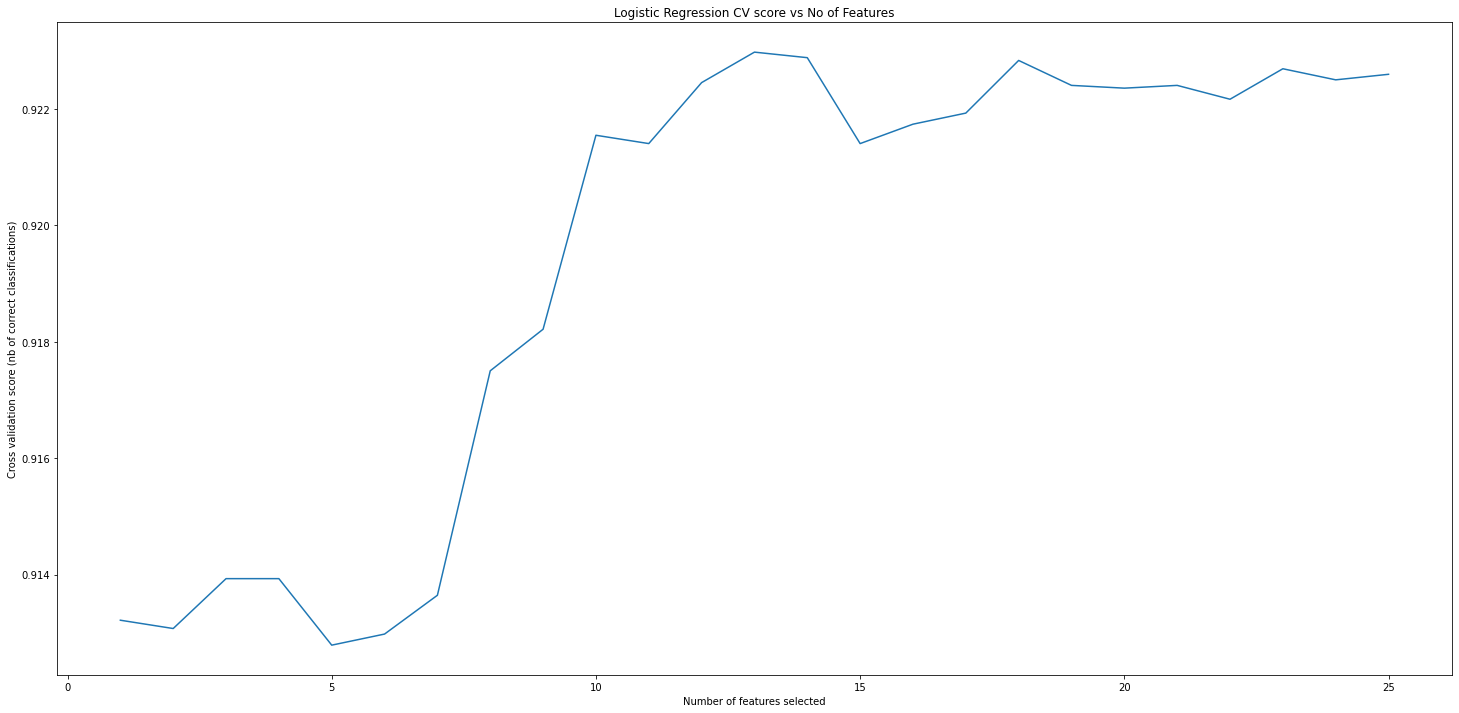

In [100]:
# plotting no.of features vs Cross validation score
plt.figure(figsize=[25,12])      
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### From the above plot we can see thatnumber of optimal features is 13.

In [101]:
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train_pca, y_train)

In [102]:
rfe.support_            # support of all x frame columns.

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False,  True, False,  True,  True,  True])

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))      # columns and rfe_support of each column.

[('arpu_8', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 3),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 11),
 ('loc_og_t2f_mou_7', False, 8),
 ('loc_og_t2f_mou_8', False, 12),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', False, 7),
 ('loc_og_mou_8', False, 4),
 ('std_og_t2t_mou_6', False, 9),
 ('std_og_t2m_mou_6', False, 6),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_mou_6', True, 1),
 ('std_og_mou_8', False, 13),
 ('spl_og_mou_8', False, 2),
 ('total_og_mou_8', False, 5),
 ('loc_ic_t2t_mou_7', True, 1),
 ('loc_ic_t2t_mou_8', False, 10),
 ('loc_ic_t2m_mou_6', True, 1),
 ('loc_ic_t2m_mou_7', True, 1),
 ('loc_ic_t2m_mou_8', True, 1)]

In [104]:
col = X_train_pca.columns[rfe.support_]  # seperating the rfe supported columns.

In [105]:
# Final Logistic regression model with rfe
X_train_sm_pca = sm.add_constant(X_train_pca[col])
log = sm.GLM(y_train.values.reshape(-1,1),X_train_sm_pca, family = sm.families.Binomial())
res = log.fit()

In [106]:
res.summary()             # Summary of the final model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4275.0
Date:                Thu, 28 Jan 2021   Deviance:                       8549.9
Time:                        13:56:00   Pearson chi2:                 6.52e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6727      0.057    -64.053      0.000      -3.785      -3.560
pca1          -0.4364      0.016    -27.687      0.000      -0.467      -0.406
pca2          -0.2810      0.015    -18.162      0.000      -0.311      -0.251
pca3          -0.2376      0.029     -8.121      0.000      -0.295      -0.180
pca4          -0.3106      0.027    -11.614      0.000      -0.363      -0.258
pca6           0.2692      0.028      9.524      0.000       0.214       0.325
pca7          -0.2874      0.032     -9.046      0.000      -0.350      -0.225
pca11         -0.3271      0.050     -6.520      0.000      -0.425      -0.229
pca16          0.5409      0.040     13.499      0.000       0.462       0.619
pca17         -0.2411      0.044     -5.443      0.000      -0.328      -0.154
pca21          0.5179      0.052      9.868      0.000       0.415       0.621
pca23         -0.4604      0.068     -6.792      0.000      -0.593      -0.328
pca24          0.2942      0.075      3.915      0.000       0.147       0.442
pca25          0.8977      0.075     11.906      0.000       0.750       1.045
==============================================================================
"""

#### we can see that all the features have acceptable p-values and since we applied pca we do not need to check for vif.

In [107]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm_pca)
y_train_pred[:10]

0   0.03552
1   0.00451
2   0.01406
3   0.03538
4   0.10829
5   0.01374
6   0.08958
7   0.00334
8   0.02313
9   0.00645
dtype: float64

In [108]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()          # converting the above results as a dataframe.

Churn  Churn_Prob  CustID
0      0     0.03552    4715
1      0     0.00451   15222
2      0     0.01406   60145
3      0     0.03538   62445
4      0     0.10829   88349

#### Now we need to find the optimal percentage of churn_probability to classify customers as churn or not.

In [109]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0     0.03552    4715    1    0    0    0    0    0    0    0    0    0
1      0     0.00451   15222    1    0    0    0    0    0    0    0    0    0
2      0     0.01406   60145    1    0    0    0    0    0    0    0    0    0
3      0     0.03538   62445    1    0    0    0    0    0    0    0    0    0
4      0     0.10829   88349    1    1    0    0    0    0    0    0    0    0

In [110]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

           prob  accuracy   sensi   speci
0.00000 0.00000   0.08678 1.00000 0.00000
0.10000 0.10000   0.82239 0.78168 0.82626
0.20000 0.20000   0.89556 0.66758 0.91722
0.30000 0.30000   0.92007 0.57323 0.95303
0.40000 0.40000   0.92641 0.46078 0.97065
0.50000 0.50000   0.92326 0.27702 0.98467
0.60000 0.60000   0.91727 0.09051 0.99583
0.70000 0.70000   0.91412 0.01481 0.99958
0.80000 0.80000   0.91331 0.00219 0.99990
0.90000 0.90000   0.91327 0.00055 1.00000


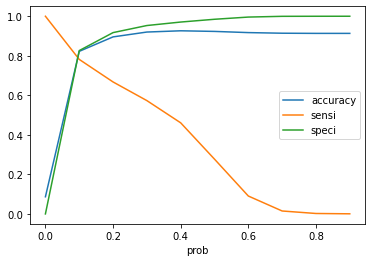

In [111]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above plot we can see that 0.1 is the optimal probability to classify churn.

In [112]:
y_train_pred_final.drop(numbers,axis=1,inplace=True)
y_train_pred_final['Predicted']= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()         # Converting the results with optimal probability as a dataframe.

Churn  Churn_Prob  CustID  Predicted
0      0     0.03552    4715          0
1      0     0.00451   15222          0
2      0     0.01406   60145          0
3      0     0.03538   62445          0
4      0     0.10829   88349          1

### Evaluation Metrics:

#### Since class imbalance is present in target variable, we need to look further than accuracy in evaluation metrics.

In [113]:
# Accuracy

accuracy=metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted)
accuracy

0.8223925358213928

In [114]:
# Now we build confusion matrix to try out more metrics
conf_mat = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
conf_mat

array([[15851,  3333],
       [  398,  1425]], dtype=int64)

In [115]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model.
sensitivity=TP / float(TP+FN)
sensitivity

0.7816785518376302

In [117]:
# Let us calculate specificity.
specificity=TN / float(TN+FP)
specificity

0.8262614678899083

In [118]:
# Calculate false postive rate - predicting churn when customer does not have churned
fpr=FP/ float(TN+FP)
fpr

0.17373853211009174

In [119]:
# Calculate false negative rate - predicting not churn when customer has churned
fnr=FN/ float(FN+TP)
fnr

0.21832144816236973

### Plotting an ROC Curve:

In [120]:
def draw_roc( actual, probs ):             # custom function for plotting a ROC Curve.
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [121]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

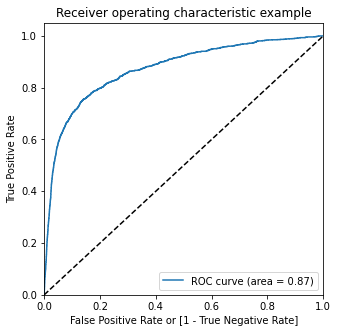

In [122]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)      # ROC Curve for train dataset.

### Making predictions on test set:

In [123]:
X_test_pca.head()      # checking X_test_pca 

pca1     pca2     pca3     pca4     pca5     pca6     pca7     pca8  \
0 -2.31839 -1.57082  0.91355 -3.18293 -1.42707  1.69176 -1.76615  0.74312   
1 -3.97993  0.37605 -0.11268 -0.02921  0.76622  2.14086 -0.24819 -0.37475   
2 -1.39363 -2.05315  1.40280  2.12511  0.14726  0.06548  1.33804  0.94798   
3  1.50632 -1.73248 -0.49362 -0.55491 -1.82897 -0.25217  1.88394 -1.41009   
4  1.86575 -0.29844 -3.76563 -0.18617  3.08206 -0.11528 -1.92382 -1.40203   

      pca9    pca10    pca11    pca12    pca13   pca14    pca15    pca16  \
0 -0.25281  1.22874 -0.46437 -0.08450  0.13106 0.21682 -0.49179 -1.21661   
1  1.78581  1.43539  0.23980  0.94636 -0.27675 1.07662 -1.39975 -2.35608   
2  1.53254 -1.06797  0.17967 -0.43762 -1.35862 0.86062 -0.85208 -0.17455   
3 -1.11531 -1.05138 -1.00940  0.14710 -1.59666 1.37338  0.32156  1.13152   
4 -1.48623  0.18839  2.71480 -0.22933  1.83388 0.53044  0.29897  1.29632   

     pca17    pca18    pca19   pca20    pca21    pca22    pca23    pca24  \
0 -0.59328  0.20080 -0.19163 1.02920 -0.21698 -1.57333 -0.46237  0.45132   
1  0.33417 -0.13517 -1.13796 0.15917 -0.56067  0.85364  0.10513 -0.08949   
2  0.14732  0.19639  0.33409 0.51015 -0.90921  0.25905 -0.07000 -0.08881   
3 -0.10789  0.25534 -0.74488 0.61810 -1.04791 -0.12259  0.94712  0.40130   
4  2.12983  0.42314  1.50279 3.14627 -0.51963  0.05124 -0.17306  0.10841   

     pca25  
0  0.42341  
1 -0.58592  
2 -0.03544  
3 -0.66103  
4 -0.12856

In [124]:
y_test.head()            # checking  y_test

29360    0
49979    0
90612    0
87007    0
91852    0
Name: churn, dtype: int64

In [125]:
X_test_sm_pca = sm.add_constant(X_test_pca[col])   # seperating rfe supported columns like in X_train_sm_pca.

In [126]:
y_test_pred = res.predict(X_test_sm_pca)   # fitting the test data set to the model.

In [127]:
y_test_pred.head()        # test set predictions

0   0.44163
1   0.02454
2   0.01063
3   0.00948
4   0.01980
dtype: float64

In [128]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_pred_1 = pd.DataFrame(y_test_pred)


# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final[['CustID','churn','Churn_Prob']]

y_pred_final.head()

CustID  churn  Churn_Prob
0   29360      0     0.44163
1   49979      0     0.02454
2   90612      0     0.01063
3   87007      0     0.00948
4   91852      0     0.01980

In [129]:
y_pred_final['Predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

# mapping predicted values using optimal probability found in train data.

In [130]:
y_pred_final.head()      # top n rows of dataframe.

CustID  churn  Churn_Prob  Predicted
0   29360      0     0.44163          1
1   49979      0     0.02454          0
2   90612      0     0.01063          0
3   87007      0     0.00948          0
4   91852      0     0.01980          0

#### Evaluation metrics:

In [131]:
# Let's check the overall accuracy.
accuracy=metrics.accuracy_score(y_pred_final.churn, y_pred_final.Predicted)
accuracy

0.8208573967125722

In [132]:
conf_mat = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.Predicted )
conf_mat                # Confusion matrix

array([[6779, 1455],
       [ 158,  612]], dtype=int64)

In [133]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
sensitivity

0.7948051948051948

In [135]:
# Let us calculate specificity
specificity=TN / float(TN+FP)
specificity

0.8232936604323536

In [136]:
# Calculate false postive rate - predicting churn when customer does not have churned
fpr=FP/ float(TN+FP)
fpr

0.17670633956764634

In [137]:
# Calculate false negative rate - predicting not churn when customer has churned
fnr=FN/ float(FN+TP)
fnr

0.2051948051948052

In [138]:
# Positive predictive value 
ppv=TP / float(TP+FP)
ppv

0.2960812772133527

In [139]:
# Negative predictive value 
npv=TN / float(TN+FN)
npv

0.9772235836817068

#### ROC Curve:

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn, y_pred_final.Churn_Prob, drop_intermediate = False )

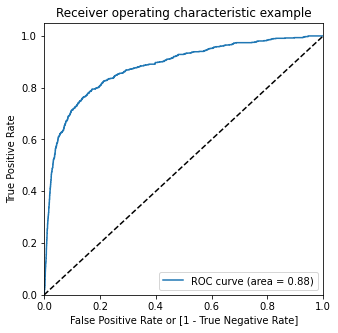

In [141]:
draw_roc(y_pred_final.churn, y_pred_final.Churn_Prob)     # ROC Curve for test data set.

Till now we handled class imbalance by using different evaluation metrics other than accuracy like Sensitivity,Specificity,False Positive Rate and ROC Curve.

From the above Logisitic regression model we can only classify whether customers churn or not. To find which features are significant in classifying churn we need to work with other models such as Decision tree, Randomforest etc.

# Decision Tree :

In [142]:
df.head()   # First n rows of dataframe

arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7  1258.55550     52.29000     325.91000          31.38000          40.28000   
8   137.36200     35.08000     136.48000         217.59000          12.49000   
13  593.26000    534.24000     482.46000           6.19000          36.01000   
16  187.89400     70.61000     162.76000          65.16000          67.38000   
17   25.49900      7.79000       5.54000           0.00000           0.00000   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_7  \
7          308.63000         447.38000         162.28000          34.08500   
8           80.96000          70.58000          50.54000           0.00000   
13         151.13000          47.28000         294.46000           0.00000   
16         273.29000         145.99000         128.28000           4.48000   
17          58.54000           0.00000           0.00000           0.00000   

    loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7           31.31000     422.16000     533.91000     255.79000   
8            0.00000     378.09000     288.18000      63.04000   
13          23.51000     205.31000      53.48000     353.99000   
16          10.26000     315.91000     215.64000     205.93000   
17           0.00000      97.54000       0.00000       0.00000   

    std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2m_mou_8  std_og_mou_6  \
7            4.30000          49.89000          49.14000      60.86000   
8          116.56000          13.69000          75.69000     130.26000   
13         446.41000         255.36000         156.94000     701.78000   
16           7.89000          22.99000          18.29000      30.89000   
17         986.24500           1.55000           0.00000    1148.46000   

    std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_7  \
7       77.84000       6.50000       350.16000          32.26000   
8       98.28000      10.23000       171.56000           9.84000   
13     655.18000       4.78000      1015.26000           7.58000   
16      21.53000       5.91000       233.38000          71.44000   
17       0.00000       0.00000         0.00000           0.00000   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
7           27.31000         217.56000         221.49000         121.19000   
8            0.31000          57.58000          13.98000          15.48000   
13          52.58000         142.88000          18.53000         195.18000   
16          28.89000         226.81000         149.69000         150.16000   
17           0.00000          47.41000           2.31000           0.00000   

    loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
7           76.04500          39.53000     427.88000     355.23000   
8            0.00000           0.00000      81.43000      23.83000   
13           0.00000           7.49000     215.58000      26.11000   
16           8.68000          32.71000     276.86000     229.83000   
17           0.00000           0.00000      81.96000       2.31000   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7      188.04000          30.39000         121.87500          10.98000   
8       15.79000           0.10000           0.65000           0.00000   
13     255.26000          61.56000         121.87500           1.91000   
16     211.78000           6.33000          73.93000           2.18000   
17       0.00000           0.00000           0.00000           0.00000   

    std_ic_mou_8  total_ic_mou_7  total_ic_mou_8  total_rech_num_8  \
7      191.95500       558.04000       428.74000                 7   
8        0.75000        28.49000        16.54000                14   
13     191.95500       172.58000       926.56000                11   
16      82.44000       381.56000       294.46000                 2   
17       0.00000         2.31000         0.00000                 4   

    total_rech_amt_8  max_rech_amt_8 date_of_last_

In [143]:
df.shape      # shape of dataframe

(30011, 47)

In [144]:
X=df.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','churn'],axis=1)
y=df['churn']                    # Seperating dataframe into target and predictors.

In [145]:
X.head()            # predictor dataframe 

arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
7  1258.55550     52.29000     325.91000          31.38000          40.28000   
8   137.36200     35.08000     136.48000         217.59000          12.49000   
13  593.26000    534.24000     482.46000           6.19000          36.01000   
16  187.89400     70.61000     162.76000          65.16000          67.38000   
17   25.49900      7.79000       5.54000           0.00000           0.00000   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_7  \
7          308.63000         447.38000         162.28000          34.08500   
8           80.96000          70.58000          50.54000           0.00000   
13         151.13000          47.28000         294.46000           0.00000   
16         273.29000         145.99000         128.28000           4.48000   
17          58.54000           0.00000           0.00000           0.00000   

    loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
7           31.31000     422.16000     533.91000     255.79000   
8            0.00000     378.09000     288.18000      63.04000   
13          23.51000     205.31000      53.48000     353.99000   
16          10.26000     315.91000     215.64000     205.93000   
17           0.00000      97.54000       0.00000       0.00000   

    std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2m_mou_8  std_og_mou_6  \
7            4.30000          49.89000          49.14000      60.86000   
8          116.56000          13.69000          75.69000     130.26000   
13         446.41000         255.36000         156.94000     701.78000   
16           7.89000          22.99000          18.29000      30.89000   
17         986.24500           1.55000           0.00000    1148.46000   

    std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_7  \
7       77.84000       6.50000       350.16000          32.26000   
8       98.28000      10.23000       171.56000           9.84000   
13     655.18000       4.78000      1015.26000           7.58000   
16      21.53000       5.91000       233.38000          71.44000   
17       0.00000       0.00000         0.00000           0.00000   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
7           27.31000         217.56000         221.49000         121.19000   
8            0.31000          57.58000          13.98000          15.48000   
13          52.58000         142.88000          18.53000         195.18000   
16          28.89000         226.81000         149.69000         150.16000   
17           0.00000          47.41000           2.31000           0.00000   

    loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
7           76.04500          39.53000     427.88000     355.23000   
8            0.00000           0.00000      81.43000      23.83000   
13           0.00000           7.49000     215.58000      26.11000   
16           8.68000          32.71000     276.86000     229.83000   
17           0.00000           0.00000      81.96000       2.31000   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
7      188.04000          30.39000         121.87500          10.98000   
8       15.79000           0.10000           0.65000           0.00000   
13     255.26000          61.56000         121.87500           1.91000   
16     211.78000           6.33000          73.93000           2.18000   
17       0.00000           0.00000           0.00000           0.00000   

    std_ic_mou_8  total_ic_mou_7  total_ic_mou_8  total_rech_num_8  \
7      191.95500       558.04000       428.74000                 7   
8        0.75000        28.49000        16.54000                14   
13     191.95500       172.58000       926.56000                11   
16      82.44000       381.56000       294.46000                 2   
17       0.00000         2.31000         0.00000                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch

In [146]:
y.head()             # target variable

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

## Handling class imbalance with Re-sampling techniques:

In [147]:
df['churn'].value_counts(normalize=True)   # Analysing the distribution of target variable.

0   0.91360
1   0.08640
Name: churn, dtype: float64

#### we can see that target variable is severely imbalanced.

#### So we use SMOTE technique to handle this imbalance problem.

In [148]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', X.shape,y.shape)
print('Resample dataset shape', x_smote.shape,y_smote.shape)

Original dataset shape (30011, 43) (30011,)
Resample dataset shape (54836, 43) (54836,)


## Train-Test Split:

In [149]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, train_size=0.7, test_size=0.3, random_state=100)

In [150]:
print(X_train.shape)           # checking train-test split
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38385, 43)
(16451, 43)
(38385,)
(16451,)


## Scaling:

In [151]:
scaler=StandardScaler()         # Creating Scaler object

In [152]:
columns=X.select_dtypes(include=np.number).columns  # seperating numerical columns for scaling.

X_train[columns] = scaler.fit_transform(X_train[columns])      # fitting and transforming data set X_train  with standard scaler

In [153]:
X_train.head()          # Scaled dataframe

arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
23364  2.59922      1.97964       3.12627           2.79855           3.84806   
46141 -1.07947     -0.52479      -0.56324          -0.21810          -0.51029   
18234  1.02732      3.41059      -0.12904          -0.38214          -0.43766   
33837 -0.08956     -0.41900       0.20320           0.75420          -0.34034   
3882   0.01027     -0.57929      -0.69896          -0.55859          -0.56762   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_7  \
23364           1.49958           1.66087           3.37855           3.89644   
46141           0.45748          -0.06598          -0.56651          -0.10068   
18234          -0.70374          -0.68887          -0.58299          -0.48119   
33837          -0.04646          -0.05442          -0.55146           1.09893   
3882            0.13766          -0.39933          -0.67012          -0.48119   

       loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
23364           4.08908       0.97927       2.16790       3.34858   
46141          -0.42299       0.19755      -0.17174      -0.57814   
18234          -0.42299      -0.70976      -0.65418      -0.58539   
33837          -0.27272       0.13627       0.21195      -0.52716   
3882           -0.42299      -0.20773      -0.52313      -0.68653   

       std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2m_mou_8  std_og_mou_6  \
23364          -0.64383          -0.46539          -0.15596      -0.71064   
46141          -0.64383          -0.69637          -0.50283      -0.87111   
18234           2.52750          -0.53665           0.16008       1.42966   
33837           0.62651           2.49003           0.14316       2.14799   
3882           -0.45434           0.11010          -0.50692      -0.28595   

       std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_7  \
23364      -0.31930       3.70432         2.94584           1.86526   
46141      -0.58190      -0.51419        -0.82066           0.11566   
18234       3.16336       3.70432         2.40411          -0.48889   
33837      -0.13518      -0.51419        -0.38292           1.53766   
3882       -0.58965      -0.51419        -0.82066          -0.64409   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
23364           1.31384           0.01120           1.33509           3.44141   
46141          -0.37809           1.66454           0.05071          -0.32070   
18234          -0.45324          -0.64379          -0.79791          -0.53374   
33837          -0.09805           0.38213           0.98441          -0.55919   
3882           -0.67925           1.28086          -0.09542          -0.79864   

       loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
23364          -0.33806          -0.24549      -0.29714       1.35038   
46141          -0.00644          -0.39988       1.21016       0.01457   
18234          -0.51020          -0.43577      -0.73348      -0.76970   
33837           0.34179          -0.22137       0.40363       1.08174   
3882           -0.06763          -0.46285       0.65239      -0.31099   

       loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
23364       2.92952          -0.45493           3.87327          -0.31250   
46141      -0.31091          -0.45565          -0.46090          -0.31250   
18234      -0.57964           1.65464          -0.10070          -0.31250   
33837      -0.47579           2.30546           1.10865           0.26355   
3882       -0.82425          -0.45565          -0.53432          -0.31250   

       std_ic_mou_8  total_ic_mou_7  total_ic_mou_8  total_rech_num_8  \
23364       3.88756         1.63827         3.24721           1.99192   
46141      -0.44312        -0.19911        -0.76005          -1.09638   
18234       0.37496        -0.40058        -0.36796           1.69779   
33837       1.54447         1.79373        -0.08

In [154]:
X_test[columns]=scaler.transform(X_test[columns])
X_test.head()            # Never fit the test data into scaler only use transform().

arpu_8  onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
48765 -1.10816     -0.52479      -0.56324          -0.27574          -0.56762   
4625  -0.27663      1.68865      -0.77771          -0.66120          -0.55740   
10170  0.15933      0.18585       1.18412          -0.61774          -0.39652   
17319  0.63377     -0.49137       0.69285          -0.23681          -0.00147   
20407  0.26108     -0.36252       1.15461           0.04537           0.48172   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_7  \
48765           2.10896          -0.10800          -0.67012          -0.41898   
4625           -0.84678          -0.76904          -0.65067          -0.48119   
10170          -0.80806          -0.77455          -0.58735          -0.48119   
17319           1.88984           1.60269           2.39119           0.59893   
20407          -0.09364          -0.16952           1.29996          -0.30653   

       loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
48765          -0.42299       1.33002      -0.23015      -0.68653   
4625           -0.42299      -0.86919      -0.80378      -0.67027   
10170          -0.42299      -0.77853      -0.79238      -0.57447   
17319           2.31653       1.25041       0.95179       1.61123   
20407          -0.36102      -0.12543      -0.15624       0.96799   

       std_og_t2t_mou_6  std_og_t2m_mou_6  std_og_t2m_mou_8  std_og_mou_6  \
48765          -0.64304          -0.68640          -0.50692      -0.86136   
4625            2.05685          -0.54498          -0.38996       0.84504   
10170           0.13829           0.35311           2.23252       0.21314   
17319          -0.64383          -0.68377          -0.48873      -0.86375   
20407          -0.61036           0.27877           0.94399      -0.28150   

       std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_7  \
48765      -0.58965      -0.51419        -0.82066          -0.17615   
4625        1.05730      -0.51419         0.51984          -0.41861   
10170       1.42375      -0.51419         0.85844          -0.12304   
17319      -0.57982      -0.51419         0.19348           1.25981   
20407       0.19479      -0.51419         0.53894           2.98863   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  \
48765          -0.37809           1.19865           1.07690          -0.32070   
4625           -0.62270          -0.79588          -0.78661          -0.56812   
10170          -0.50960          -0.83134          -0.74906          -0.56894   
17319           2.12993           2.98547           3.12148           3.44141   
20407           1.73222           2.86040           2.34666           3.44141   

       loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
48765           1.27300          -0.39988       0.99788       0.72122   
4625            1.37579           1.34102      -0.72694      -0.57518   
10170          -0.51020          -0.42493      -0.77885      -0.62973   
17319           0.85995           3.19569       2.94130       3.08827   
20407           1.10420           1.80486       2.92604       2.47779   

       loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
48765      -0.31091          -0.45565          -0.46090          -0.31250   
4625       -0.50825           0.12299          -0.52492          -0.31250   
10170      -0.61860          -0.43675          -0.46416          -0.31250   
17319       3.37365          -0.45565           1.36723          -0.31250   
20407       3.37365          -0.45565          -0.17665           2.71617   

       std_ic_mou_8  total_ic_mou_7  total_ic_mou_8  total_rech_num_8  \
48765      -0.44312         0.42683        -0.76005          -1.09638   
4625       -0.38842        -0.66406        -0.47465          -0.06695   
10170      -0.52853        -0.73564        -0.58174           0.37424   
17319       0.64377         2.99622         3.24

## Model:

In [155]:
dt = DecisionTreeClassifier(max_depth=5)    # simple decision tree model with out hyperparameter tuning
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

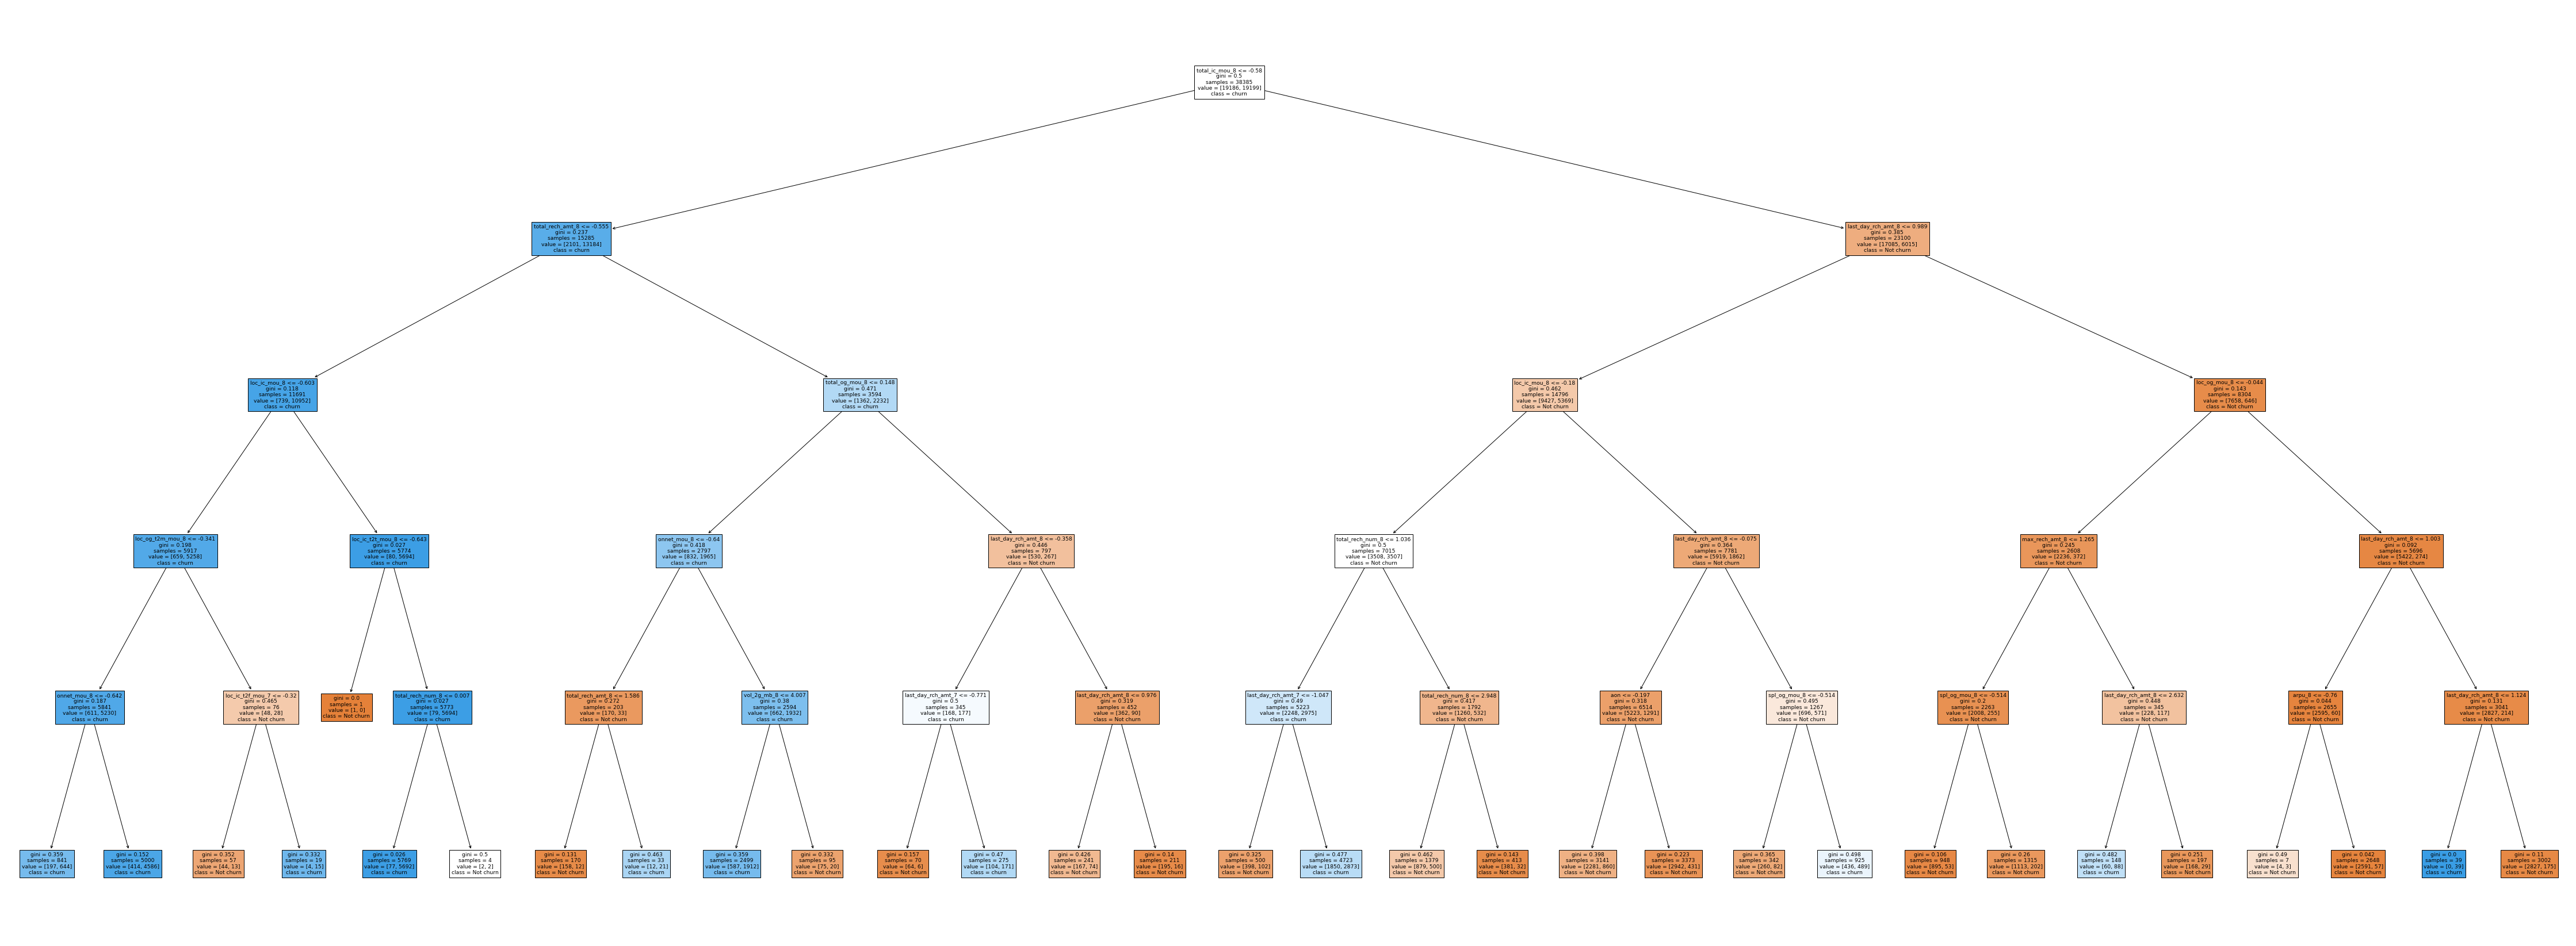

In [156]:
plt.figure(figsize=[80,30])                     # Plotting decision tree.
plot_tree(dt,feature_names=X.columns,class_names=['Not churn','churn'],filled=True)
plt.show()

#### Custom based function for evaluating models:

In [157]:
def evaluate_model(dt_classifier):   
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    confusion_rm_f=confusion_matrix(y_test, dt_classifier.predict(X_test))
    print(confusion_rm_f)
    TN = confusion_rm_f[0,0] 
    TP = confusion_rm_f[1,1] 
    FP = confusion_rm_f[0,1] 
    FN = confusion_rm_f[1,0] 
    print('Sensitivity: ', TP / float(TP+FN))
    print('Specificity: ',TN / float(TN+FP))
    print('false postive rate: ',FP/ float(TN+FP))
    print('Negative predictive value: ',TN / float(TN+ FN))
    print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))
    print("-"*50)
    print("-"*50)

In [158]:
evaluate_model(dt)               # evaluation metrics for our dataset ( for both train and test datasets.)

Train Accuracy : 0.8330076852937345
Train Confusion Matrix:
[[15445  3741]
 [ 2669 16530]]
--------------------------------------------------
Test Accuracy : 0.8242660020667436
Test Confusion Matrix:
[[6546 1686]
 [1205 7014]]
Sensitivity:  0.8533884900839518
Specificity:  0.7951895043731778
false postive rate:  0.20481049562682216
Negative predictive value:  0.8445361888788543
Misclassification Rate:  0.17573399793325634
--------------------------------------------------
--------------------------------------------------


## Decision Tree with hyperparameter tuning:

In [159]:
dt = DecisionTreeClassifier(random_state=42)       # creating a decision tree object

In [160]:
params = {                                           # creating a dictionary for different combinations of parameters.
    "max_depth": [2,3,5,10,20],
    'max_features':[5,10,15,20,25,30],
    "min_samples_leaf": [5,10,15,20,25,50,100],
    'criterion':['gini','entropy'],
    'splitter':['best','random']
}

In [161]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [162]:
%%time                   
grid_search.fit(X_train, y_train)
# Fitting the data set to grid search cv.

Fitting 4 folds for each of 840 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 1700 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 3336 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:  1.2min finished


Wall time: 1min 13s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_features': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 50, 100],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [163]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()      # Converting our grid search cv results into a dataframe.

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.06109       0.00302          0.00723         0.00216   
1        0.03191       0.00254          0.00499         0.00000   
2        0.05859       0.00192          0.00648         0.00086   
3        0.04114       0.00663          0.00723         0.00043   
4        0.06208       0.00147          0.00648         0.00050   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               2                  5                      5   
1            gini               2                  5                      5   
2            gini               2                  5                     10   
3            gini               2                  5                     10   
4            gini               2                  5                     15   

  param_splitter                                             params  \
0           best  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   
1         random  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   
2           best  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   
3         random  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   
4           best  {'criterion': 'gini', 'max_depth': 2, 'max_fea...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0            0.77628            0.78481            0.78283            0.77689   
1            0.68813            0.69341            0.69133            0.68424   
2            0.77628            0.78481            0.78283            0.77689   
3            0.68813            0.69341            0.69133            0.68424   
4            0.77628            0.78481            0.78283            0.77689   

   mean_test_score  std_test_score  rank_test_score  
0          0.78020         0.00369              621  
1          0.68928         0.00346              827  
2          0.78020         0.00369              621  
3          0.68928         0.00346              827  
4          0.78020         0.00369              621

In [164]:
dt_best = grid_search.best_estimator_
dt_best         # Getting the best estimator of the model.

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=30,
                       min_samples_leaf=5, random_state=42)

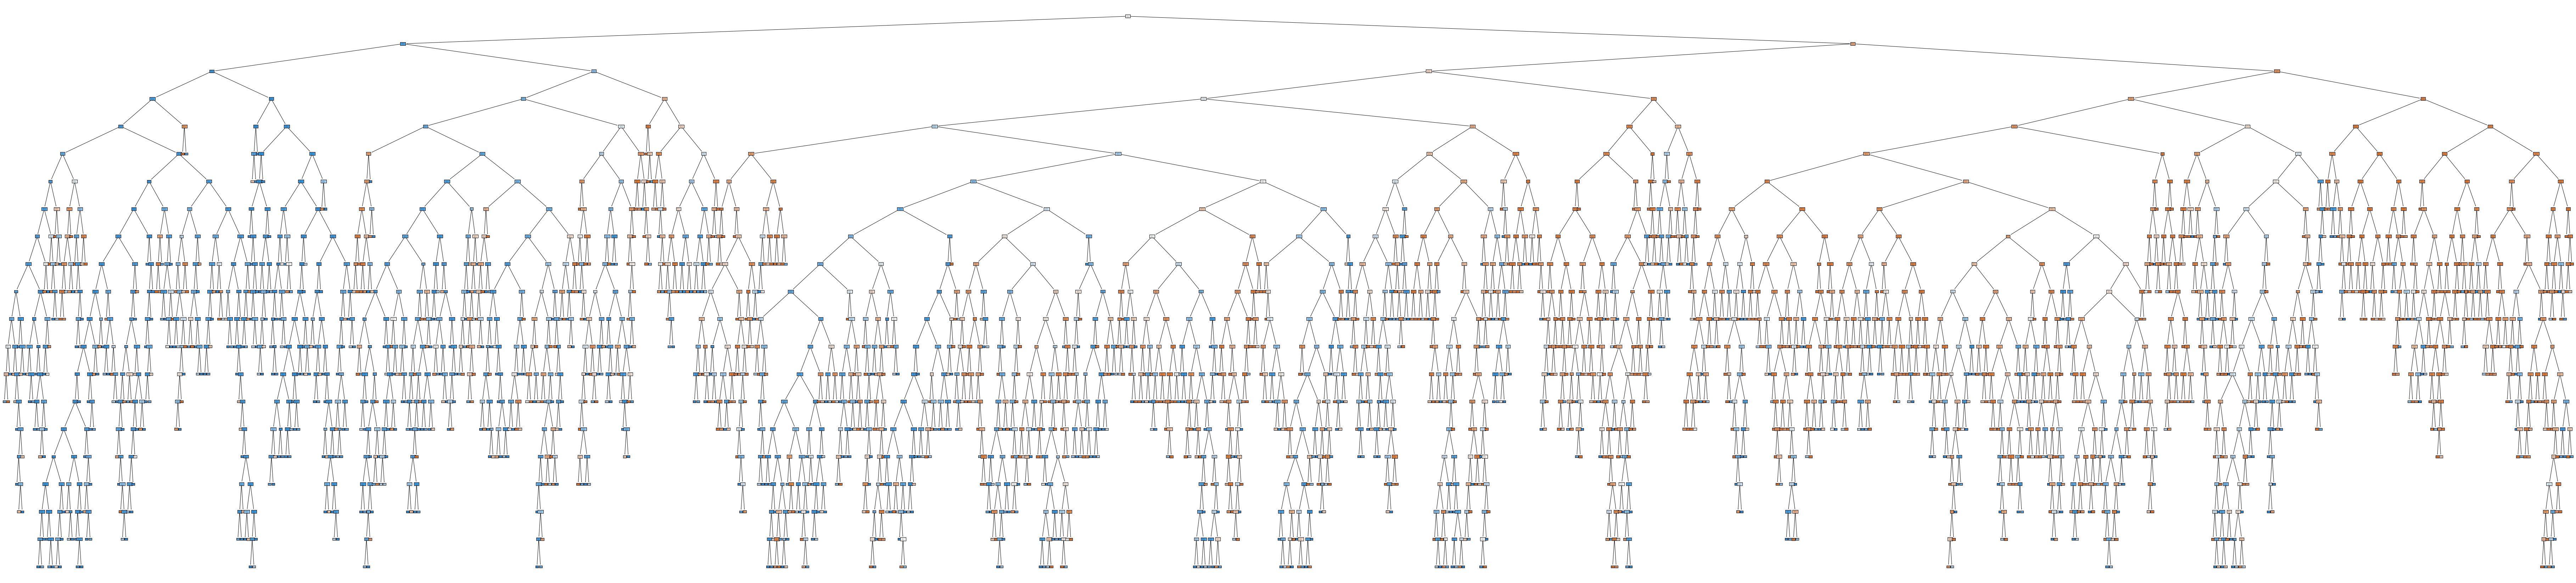

In [165]:
plt.figure(figsize=[130,30])
plot_tree(dt_best,feature_names=X.columns,class_names=['Not churn','churn'],filled=True)
plt.show()              # plotting our best estimator.

In [166]:
evaluate_model(dt_best)        # evaluation metrics for our best estimator(for both train and test datasets.)

Train Accuracy : 0.9658720854500455
Train Confusion Matrix:
[[18539   647]
 [  663 18536]]
--------------------------------------------------
Test Accuracy : 0.886754604583308
Test Confusion Matrix:
[[7222 1010]
 [ 853 7366]]
Sensitivity:  0.8962160846818348
Specificity:  0.8773080660835763
false postive rate:  0.12269193391642372
Negative predictive value:  0.8943653250773994
Misclassification Rate:  0.113245395416692
--------------------------------------------------
--------------------------------------------------


# Random Forest(with hyperparameters):

In [167]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)     
# creating a random forest classifier object.

In [168]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [3,5,8,10,15,20],
    'min_samples_leaf': [10, 20, 50, 100],
    'max_features': [5,10,15, 20, 25],
    'n_estimators': [10,25,50,75,100],
    'min_samples_split': [25,50,75,100]
}

In [169]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [170]:
%%time      
grid_search.fit(X_train,y_train)
# fitting grid search cv on our train dataset.

Fitting 4 folds for each of 2400 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 39.3min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 77.0min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 132.7min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 152.1min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 177.8min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed: 209.9min finished


Wall time: 3h 29min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10, 15, 20],
                         'max_features': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'min_samples_split': [25, 50, 75, 100],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [171]:
rf_best = grid_search.best_estimator_
rf_best                  # Getting our best estimator

RandomForestClassifier(max_depth=20, max_features=25, min_samples_leaf=10,
                       min_samples_split=25, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [172]:
evaluate_model(rf_best)        # Getting evaluation metrics of our best estimator(train & test dataset)

Train Accuracy : 0.9625895532108897
Train Confusion Matrix:
[[18436   750]
 [  686 18513]]
--------------------------------------------------
Test Accuracy : 0.9274208254817337
Test Confusion Matrix:
[[7647  585]
 [ 609 7610]]
Sensitivity:  0.9259033945735491
Specificity:  0.9289358600583091
false postive rate:  0.07106413994169096
Negative predictive value:  0.9262354651162791
Misclassification Rate:  0.07257917451826637
--------------------------------------------------
--------------------------------------------------


In [173]:
sample_tree = rf_best.estimators_[0]        # Geting a sample tree from our random forest.

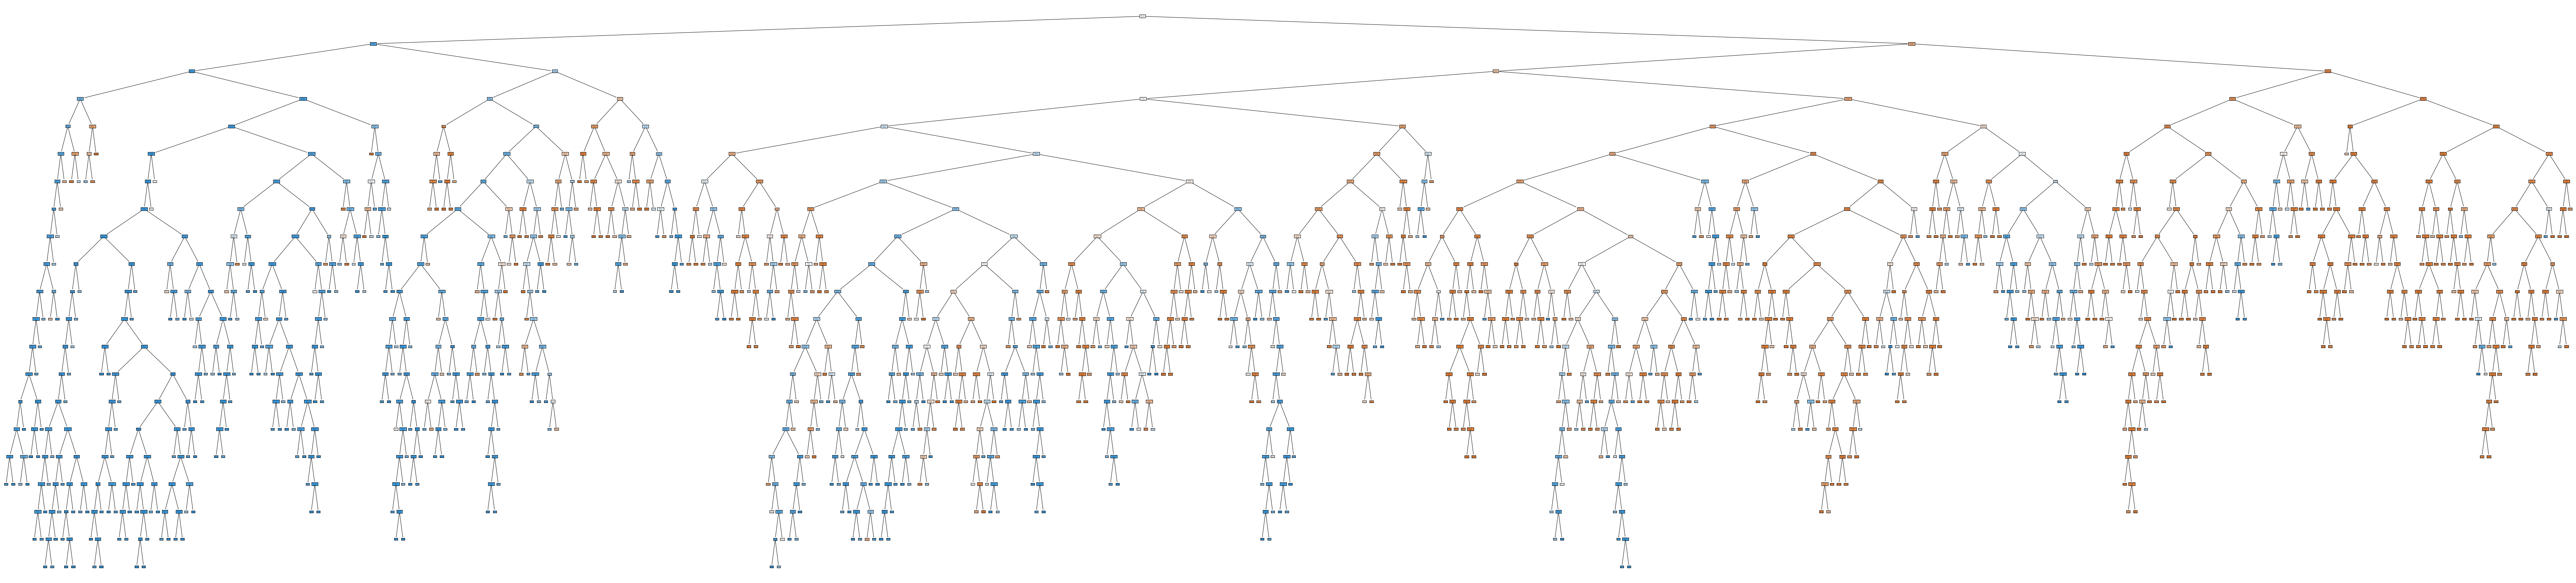

In [174]:
plt.figure(figsize=[130,30])                 # sample tree 1
plot_tree(sample_tree,feature_names=X.columns,class_names=['Not churn','churn'],filled=True)
plt.show()

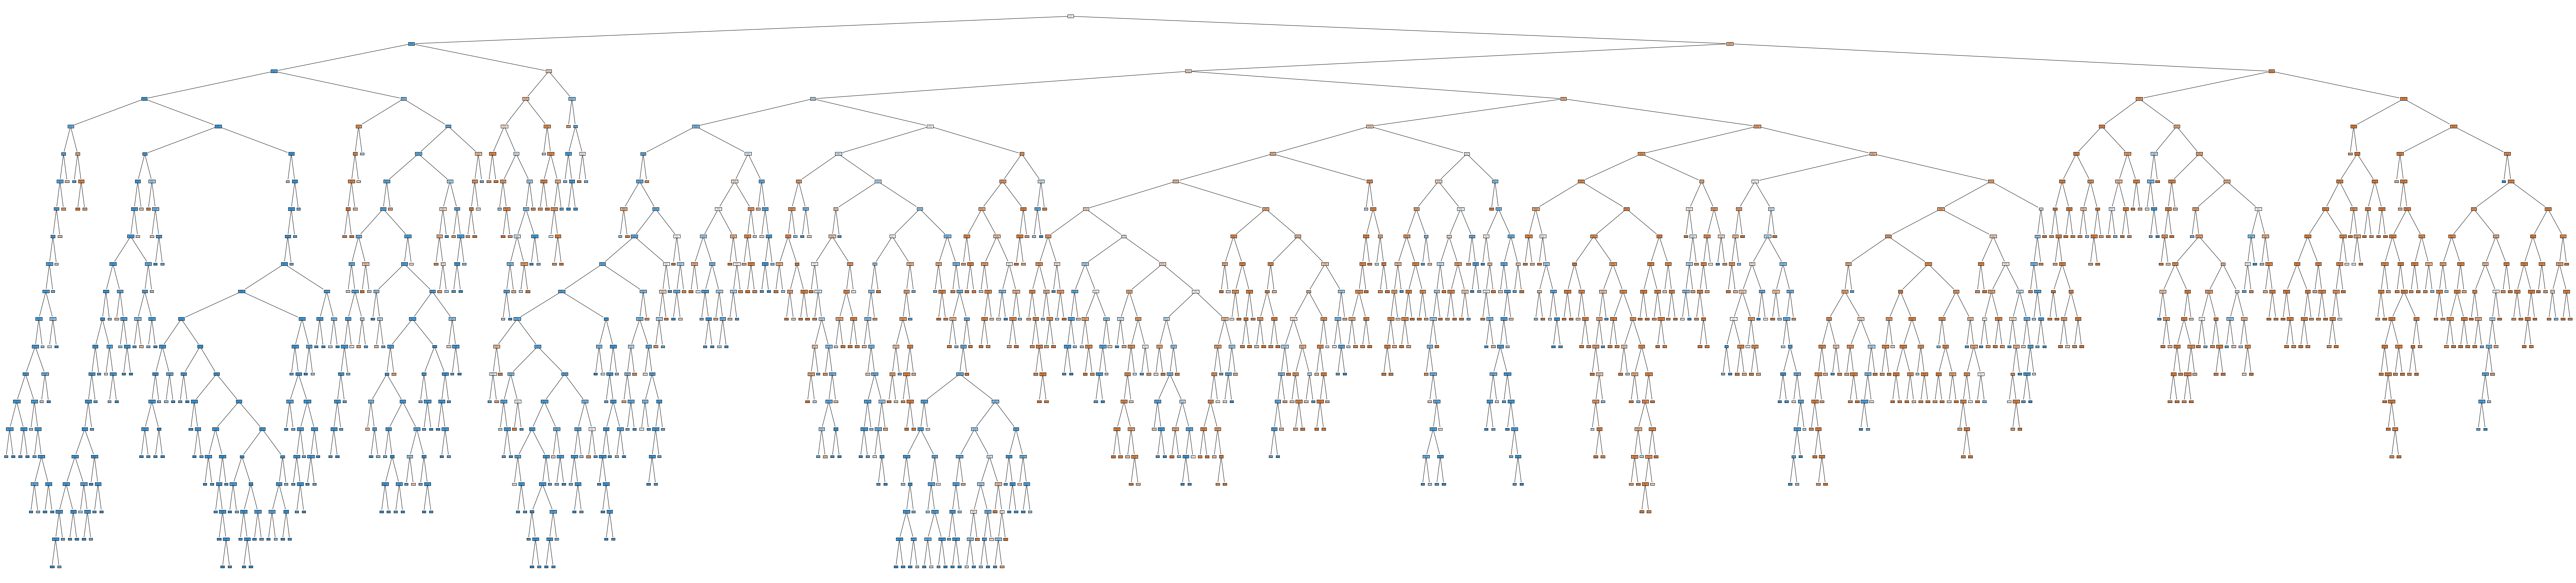

In [175]:
plt.figure(figsize=[130,30])                # sample tree 2
plot_tree( rf_best.estimators_[10],feature_names=X.columns,class_names=['Not churn','churn'],filled=True)
plt.show()

## Variable importance:

In [176]:
rf_best.feature_importances_                 # importance of all columns of our dataset.

array([0.03124206, 0.01660694, 0.00946515, 0.00773023, 0.00682176,
       0.00520616, 0.00617211, 0.00807097, 0.00444813, 0.00337724,
       0.00566716, 0.00529247, 0.01765165, 0.00895605, 0.00666357,
       0.00574803, 0.0105767 , 0.00840963, 0.01873527, 0.11548541,
       0.00835523, 0.00540899, 0.00556948, 0.00725039, 0.00898781,
       0.00567445, 0.00540421, 0.00633706, 0.00652542, 0.03924649,
       0.01071373, 0.00795092, 0.00248895, 0.00553473, 0.01310133,
       0.28122761, 0.01823703, 0.08403104, 0.01951316, 0.03215227,
       0.09433697, 0.01209764, 0.01752842])

In [177]:
imp_df = pd.DataFrame({                           # converting results into a dataframe.
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [178]:
imp_df_sort=imp_df.sort_values(by="Imp", ascending=False).head(5)      # Getting the list of top ten important columns.
imp_df_sort

Varname     Imp
35      total_ic_mou_8 0.28123
19      total_og_mou_8 0.11549
40  last_day_rch_amt_8 0.09434
37    total_rech_amt_8 0.08403
29        loc_ic_mou_8 0.03925

## Important predictors:

In [179]:
imp_pred=['total_ic_mou_8','total_og_mou_8','total_rech_amt_8','last_day_rch_amt_8']
imp_pred      # Getting the list of top 5 important variables.

['total_ic_mou_8', 'total_og_mou_8', 'total_rech_amt_8', 'last_day_rch_amt_8']

In [180]:
imp_pred.append('churn')
df_imp=df[imp_pred]             # Appending churn to that list and convert it into a dataset.
df_imp.head()

total_ic_mou_8  total_og_mou_8  total_rech_amt_8  last_day_rch_amt_8  \
7        428.74000       350.16000              1494                 252   
8         16.54000       171.56000               120                  10   
13       926.56000      1015.26000               717                   0   
16       294.46000       233.38000               160                 130   
17         0.00000         0.00000                30                   0   

    churn  
7       1  
8       0  
13      0  
16      0  
17      0

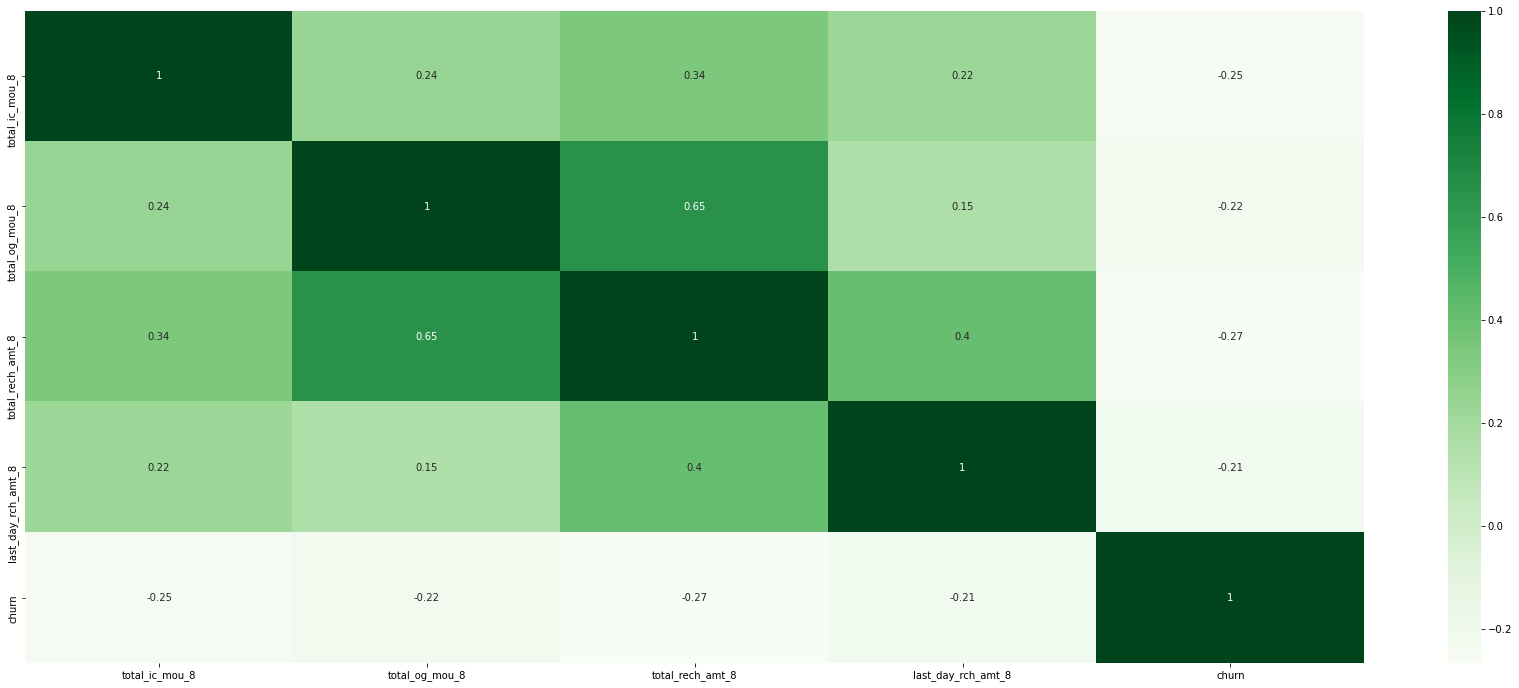

In [181]:
plt.figure(figsize=[30,12])
sns.heatmap(df_imp.corr(),annot=True,cmap='Greens')
plt.show()

#### We can see that these columns are well correlated with target variable.

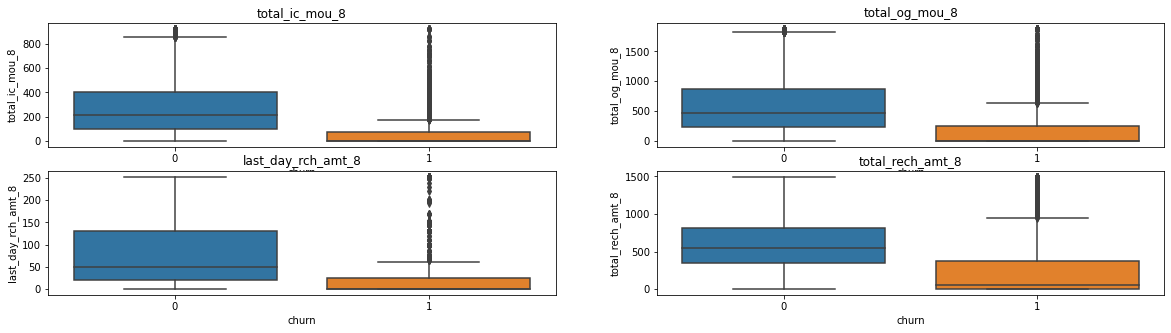

In [182]:
plt.figure(figsize= (20,5))
plt.subplot(2,2,1)
sns.boxplot(df.churn,df.total_ic_mou_8)
plt.title('total_ic_mou_8')
plt.subplot(2,2,2)
sns.boxplot(df.churn,df.total_og_mou_8)
plt.title('total_og_mou_8')
plt.subplot(2,2,3)
sns.boxplot(df.churn,df.last_day_rch_amt_8)
plt.title('last_day_rch_amt_8')
plt.subplot(2,2,4)
sns.boxplot(df.churn,df.total_rech_amt_8)
plt.title('total_rech_amt_8')
plt.show()

### We can see that for all the four variables,churned customers have higher outlier values.

In [183]:
df_imp.head()

total_ic_mou_8  total_og_mou_8  total_rech_amt_8  last_day_rch_amt_8  \
7        428.74000       350.16000              1494                 252   
8         16.54000       171.56000               120                  10   
13       926.56000      1015.26000               717                   0   
16       294.46000       233.38000               160                 130   
17         0.00000         0.00000                30                   0   

    churn  
7       1  
8       0  
13      0  
16      0  
17      0

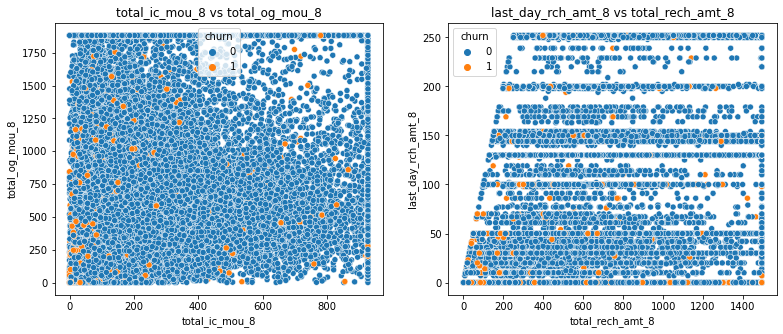

In [184]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.scatterplot(df_imp.total_ic_mou_8,df_imp.total_og_mou_8,hue = df_imp.churn)
plt.title('total_ic_mou_8 vs total_og_mou_8')
plt.subplot(1,3,2)
sns.scatterplot(df_imp.total_rech_amt_8,df_imp.last_day_rch_amt_8,hue = df_imp.churn)
plt.title('last_day_rch_amt_8 vs total_rech_amt_8')
plt.show()

# Inferences/Suggestions: